# Analaysing Circuits using Transformation: Laplace, Fourier and Complex Frequency Domain

 Mohammad Bagher Mahdizadeh
 mhdz.m@outlook.com

## Table of contents

### Overview
### Part 1
- Complex Frequency
- Fourier Series
- Why using laplace transform?
- Basic Theorems for laplace transform
- Common Laplace Transforms
### Part 2
-  Impedance and Admitance
-  Mesh and Nodal Analaysis in S domain
-  Natural response in S domain
### Part 3
-  Convolution
-  Convolution and laplace transform
### Part 4
- Passive Filters
### Part 5
- Conclusion

## Part 1

### Complex Frequincy

We are already familiar with DC, exponential and sinusoidal sources. they are all special cases of general form 
$$ eq[1]\quad v(t) = V_me^{\sigma t}\cos(wt + \theta) $$ 
 $$eq[2]\quad i(t) = I_me^{\sigma t}\cos(wt + \theta) $$
 which  
 DC: $\quad\sigma = 0\quad and\quad w = 0$
exponential: $\quad w = 0$
sinusoidal: $\quad\sigma = 0$
obviesly analysing circuits of the general form brutforcely is tedious thus being acquainted with Phasor's Analysis and it's advantages  we may seek similar approuch to avoid encoutering intregrodifrantiate equations. First by Euler's law we have: $$v(t) = Re\{ V_me^{\sigma t}e^{(wt + \theta)j}\} $$ by simplification we get $$eq[3]\quad v(t) = Re\{ V_me^{\theta j}e^{(wj + \sigma)t }\}$$ assume $ s = wt + \sigma$ we have $$eq[4]\quad v(t) = Re\{ V_me^{\theta j}e^{st }\}$$ from superposition law and knowledge of working with a leaner circuit, imaginary part of source causes imaginary response of the circuit and real part correspond to real respond so we drop Re{} in eq[4] but we can insert it whenever we want.$$ eq[5]\quad v(t) = V_me^{\theta j}e^{(wj + \sigma)t }$$ for all eq[3] to eq[5] there is a correspondance for a current source. 
s is called complex frequincy.

now we have an idea about the expression 'complex frequincy', Checking how to analyse a circuit with this technique comes next. First we start with bellow circuit: 

In [15]:
import schemdraw
import schemdraw.elements as elm

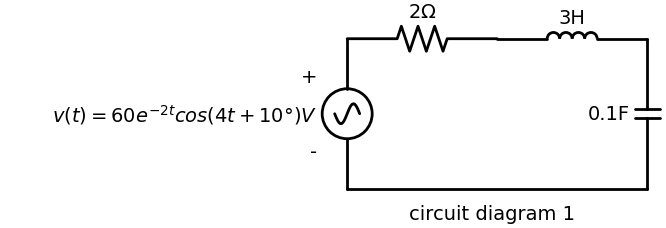

In [22]:
with schemdraw.Drawing() as d:
    elm.SourceSin().label(['-', r'$v(t) = 60e^{−2t} cos(4t + 10\degree )V$', '+'])
    elm.Resistor().label(r'$2\Omega$').right()
    elm.Inductor().label('3H')
    elm.Capacitor().label('0.1F').down()
    elm.Line().length(d.unit * 2).left()
    d.here = (d.here[0] + d.unit, d.here[1] - 0.4)
    elm.Label('circuit diagram 1')

#### Example1: find current in the circuit_diagrame_1.

$$ v(t) = 60e^{10j}e^{(4j - 2)t}\quad s = 4j - 2$$ response must be of the same frequincy thus $$ i(t) = I_me^{\phi j}e^{st}$$ applying KVL $$ v(t) = 2i(t) + 3\frac{di(t)}{dt} + \int i(t)dt$$ working with complex frequency we get$$ 60e^{10j}e^{st} = 2I_me^{\phi j}e^{st} + 3sI_me^{\phi j}e^{st} + \frac {10}{s}I_me^{\phi j}e^{st}$$ dividing both sides by $e^{st}$ we have$$ 60e^{10j} = 2I_me^{\phi j} + 3sI_me^{\phi j} + \frac {10}{s}I_me^{\phi j}$$ assuming $ I = I_me^{\phi j}$ $$ I = \frac {60e^{10j}}{2 + 3s + \frac {10}{s}}$$ by prevous assumption $s = 4j - 2$ so we have $$ I = \frac {60e^{10j}}{2 + 3(4j - 2) + \frac {10}{4j -2}}$$ by further simplification we get $$ I = \frac {60}{\sqrt {5}}e^{-106.6 j}$$ $I = I_me^{\phi j}$ so $$ \phi = -106.6 \degree,\quad I_m = 5.37$$ $$i(t) = 5.37e^{-106.6 j}e^{(4j -2)t} $$ thus $$ i(t) = 5.37e^{-2t}\cos(4t - 106.6\degree)A$$

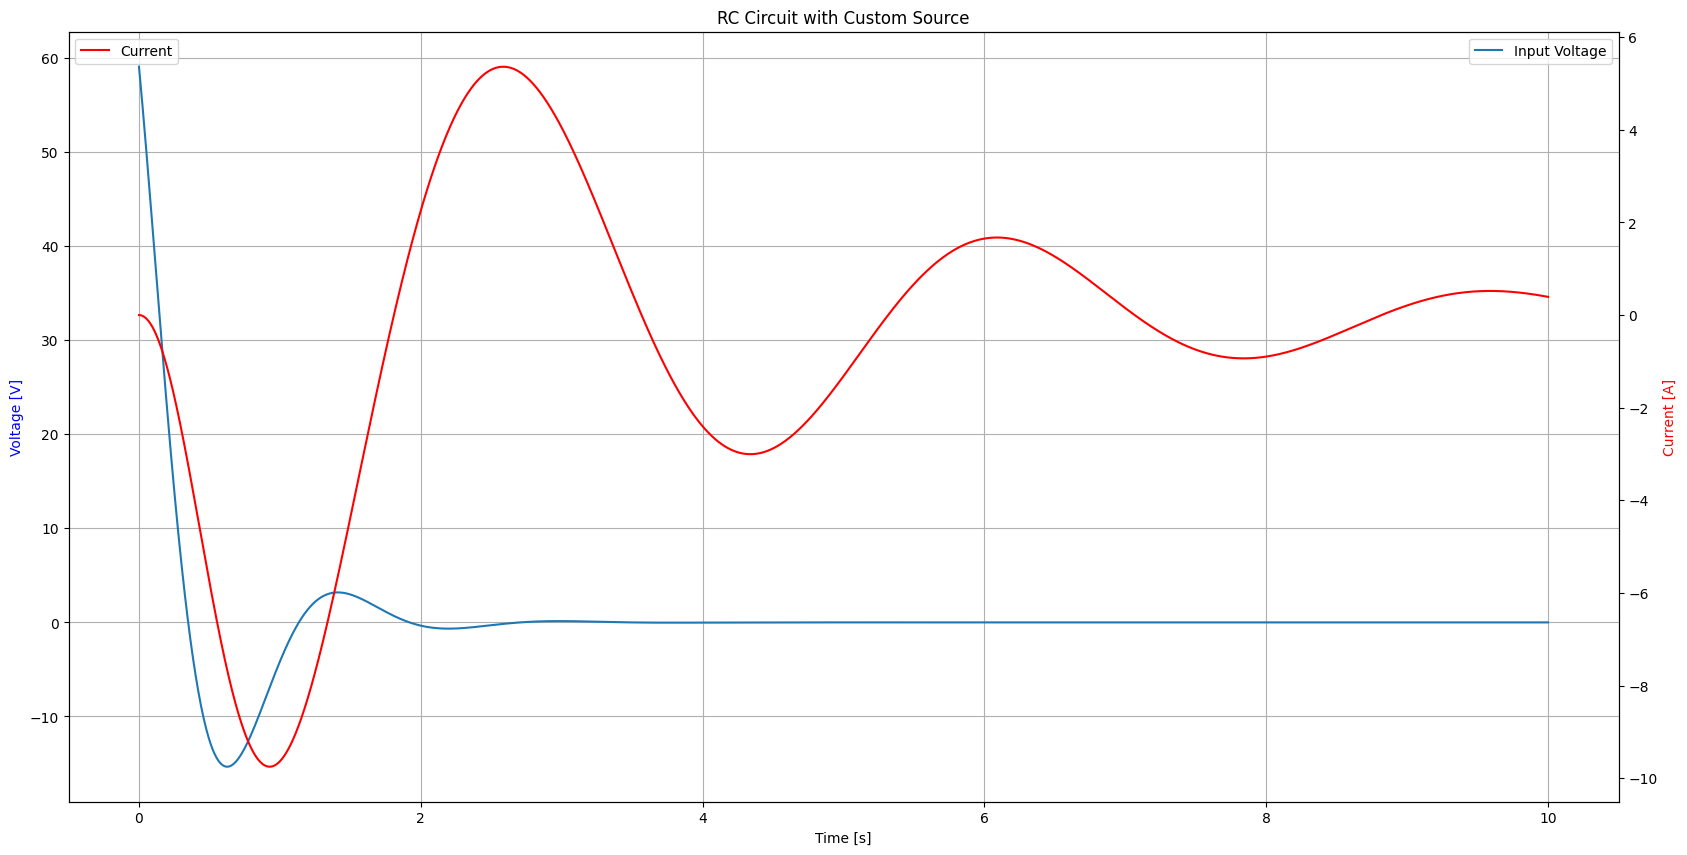

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
#from PySpice.Spice.Simulation import Transient
from PySpice.Probe.Plot import plot

# Define the circuit
circuit = Circuit('RC Circuit with Custom Source')

# Define a time-dependent voltage source
def custom_waveform(t):
    return 60 * np.exp(-2 * t) * np.cos(4 * t + np.radians(10))#10

# Add the custom voltage source using a PWL approximation
time_points = np.arange(0, 10, 1e-2)  # time from 0 to 10ms in 10us steps
voltage_points = [custom_waveform(t) for t in time_points]

circuit.V(1, 'input', circuit.gnd, 'PWL(' + ' '.join(f'{t} {v}' for t, v in zip(time_points, voltage_points)) + ')')

# Add components
circuit.R(1, 'input', 'a', 2 @ u_Ω)
circuit.L(1, 'a', 'b', 3 @ u_H)
circuit.C(1, 'b', circuit.gnd, 0.1 @ u_F)

# Perform transient analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
#simulator.initial_condition(a = 0, b=0) #very important, causes to achive forced response
analysis = simulator.transient(step_time=0.01 @ u_s, end_time= 10000 @ u_ms)

# Plot the results
figure, axe = plt.subplots(figsize=(20, 10))

# Plot input voltage
axe.plot(analysis.time, analysis['input'])
axe.set_xlabel('Time [s]')
axe.set_ylabel('Voltage [V]', color='blue')
axe.legend(['Input Voltage'], loc='upper right')
axe.grid()

# Add a secondary y-axis for current
axe_current = axe.twinx()

# Calculate and plot current (I = V/R for a simple resistor, use voltage drop for more complex circuits)
voltage_across_resistor = analysis['input'] - analysis['a']
current_through_resistor = voltage_across_resistor / 2  # R = 2Ω`
axe_current.plot(analysis.time, current_through_resistor, color='red')
axe_current.set_ylabel('Current [A]', color='red')
axe_current.legend(['Current'], loc='upper left')



plt.title('RC Circuit with Custom Source')
plt.show()



### Fourier Transform

In previous section we got familiar with Complex Frequincy and how it helps us to simplify an integrodiffrential equation into algebric equation. But not all forcing function are like $\quad  V_me^{\sigma t}cos(wt + \theta)$ they even may not be priodic. In this section I introduce a method that lets us convert any periodic function $f(t)$ as $\quad f(t) = a_0 + \Sigma_{n = 1}^{\infty}(a_ncos(nw_0t) + b_nsin(nw_0t))$ and also in complex form of . In next section we will study another method that lets us transform a function directly from time domain into frequency domain.

Function $f(t)$ must satisfy following certeria:
- 1- $f(t)$ is single valued every where.(is a mathematical function.)
- 2- The integral $\quad \int_{t_0)}^{t_0+T}|f(t)|dt$ exist.
- 3- Has finite number of discontinuities in any one period.
- 4- Has finite number of maxmima and minima  in any one period.
We first focus on triangular form of a Fourier Transform first. It worths to check proof of Fourier Transform, provided in part 5th.

#### Fourier Analysis for Triangular Form:

Is the attempt to find Fourier Transform's coefficients($a_n, b_n$). First look at the eq[6] $$ eq[6]:\quad f(t) = a_0 + \Sigma_{n = 1}^{\infty}(a_ncos(n\omega t) + b_nsin(n\omega t))$$ in eq[6] $\omega = \frac{2\pi}{T}$ which $T$ is the period of $f(t)$. by getting integral of both sides:$$ finding \quad a_0:$$ $$ \int_{0}^{T}f(t)dt = \int_{0}^{T}a_0dt + \int_{0}^{T}b_n sin(n\omega t) + \int_{0}^{T}a_ncos(n\omega t)$$ $$ \int_{0}^{T}cos(n\omega t)dt = 0,\quad \int_{0}^{T}sin(n\omega t)dt = 0$$ $$ \int_{0}^{T}f(t)dt = a_0T |_{0}^{T}$$ $$eq[7]:\quad a_0 = \frac{\int_{0}^{T}f(t)dt}{T} $$ $$ finding \quad a_k:$$ $$ f(t)cos(k\omega t) = a_0cos(k\omega t) + \Sigma_{n = 1}^{\infty}(a_ncos(n\omega t)cos(k\omega t) + b_nsin(n\omega t)cos(k\omega t))$$ $$ \int_{0}^{T}f(t)cos(k\omega t)dt = \int_{0}^{T}a_0cos(k\omega t)dt + \int_{0}^{T}\Sigma_{n = 1}^{\infty}(a_ncos(n\omega t)cos(k\omega t) + b_nsin(n\omega t)cos(k\omega t))dt$$ $$ \int_{0}^{T}sin(n\omega t)cos(k\omega t)dt = 0, (k \neq n)$$ $$ a_i = \frac{2}{T}\int_{0}^{T}f(t)cos(i\omega t)dt$$ $$ finding\quad b_k:$$ $$ \int_{0}^{T}sin(k\omega t)f(t)dt = \int_{0}^{T}a_0sin(k\omega t)dt + \int_{0}^{T}(\Sigma_{n = 1}^{\infty}(a_i\sin{k\omega t}\cos{n\omega t}) + b_i\sin{k\omega t}\sin{n\omega t})dt$$ $$ eq[8]:\quad b_k = \frac{2}{T}\int_{0}^{T}\sin{k\omega t}f(t)dt$$

#### Example[2]:

Find Fourier Transform of bellow waveform.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

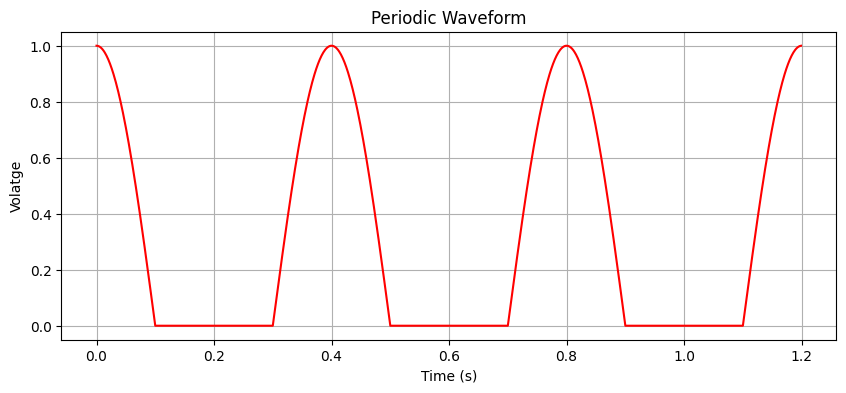

In [30]:
# Define the parameters
Vm = 1  # Amplitude of the waveform
T = 0.4  # Period of the waveform

# Create time vectors for each segment
t1 = np.linspace(0, 0.1, 100, endpoint=False)
t2 = np.linspace(0.1, 0.3, 200, endpoint=False)
t3 = np.linspace(0.3, 0.4, 100, endpoint=False)

# Create the waveform for each segment
y1 = Vm * np.cos(5 * np.pi * t1)
y2 = np.zeros_like(t2)
y3 = Vm * np.cos(5 * np.pi * t3)

# Concatenate the segments to form one period
t_period = np.concatenate((t1, t2, t3))
y_period = np.concatenate((y1, y2, y3))

# Repeat the period to cover a larger time range
num_periods = 3  # Number of periods to plot
t = np.concatenate([t_period + n * T for n in range(num_periods)])
y = np.tile(y_period, num_periods)

# Plot the waveform
plt.figure(figsize=(10, 4))
plt.plot(t, y, color='red')
plt.title('Periodic Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Volatge')
plt.grid(True)
plt.show()


As we can induct from the plot $T = 0.4s \rightarrow w_0 = 5\pi$. Now we define the plot as a piecewise function for $ 0 \leq t \geq 0.4$ .
$$
v(t) = \begin{cases} 
\cos{(5\pi t)} & \text{if } 0 \leq t < 0.1 \\ 
0 & \text{if } 0.1 \leq t < 0.3 \\ 
\cos{(5\pi t)} & \text{if } 0.3 \leq t \leq 0.4 
\end{cases}
$$
$$
\text{Start Fourier Transform Analysis:}
$$
$$
\text{finding } a_0 : \\
$$
$$
a_0 = \frac{\int_{0}^{T}v(t)dt}{T} = \frac{\int_{0}^{0.1}\cos{5\pi t}dt + 0 \int_{0.3}^{0.4}\cos{5\pi t}dt}{0.4} = \frac{1}{\pi}
$$
$$
\text{find  } a_i,\quad i \geq 1 \text{:}
$$
$$
b_i = 2 * \frac{\int_{0}^{T}\sin(i5\pi t)v(t)dt}{T} 
$$
$$
\text{which is always zero}
$$
$$
\text{finding  } a_i, i \geq 1:  
$$
$$
a_i = \frac{2}{0.4}\int_{0}^{0.4}\cos{i5\pi t}\cos{5\pi t}dt
$$
$$
\text{the form of function for unity is different from anyother values of i:}
$$
$$
a_1 = 5\int_{0}^{0.4}\cos^{2}{5\pi t}dt = \frac{1}{2}
$$
$$
\text{finding  } a_i \text{ for i > 1}:
$$
$$
a_i = 5\int_{0}^{0.1}\frac{[\cos{(1 + i)5\pi t + \cos{(1 - i)5\pi t}}]}{2} + 5\int_{0.3}^{0.4}\frac{[\cos{(1 + i)5\pi t + \cos{(1 - i)5\pi t}}]}{2}
$$
$$
a_i = \frac{2}{\pi}\frac{\cos{\frac{\pi i}{2}}}{1 - i^{2}}\text{,   } i \neq 1
$$
$\text{ }$ Final result is as bellow:
$$
v(t) = \frac{1}{\pi} + \frac{1}{2}\cos{5\pi t} + \frac{2}{3\pi}\cos{10\pi t}-\frac{2}{15\pi}\cos{20\pi t} + \frac{2}{35\pi}\cos{30\pi t} - ...
$$

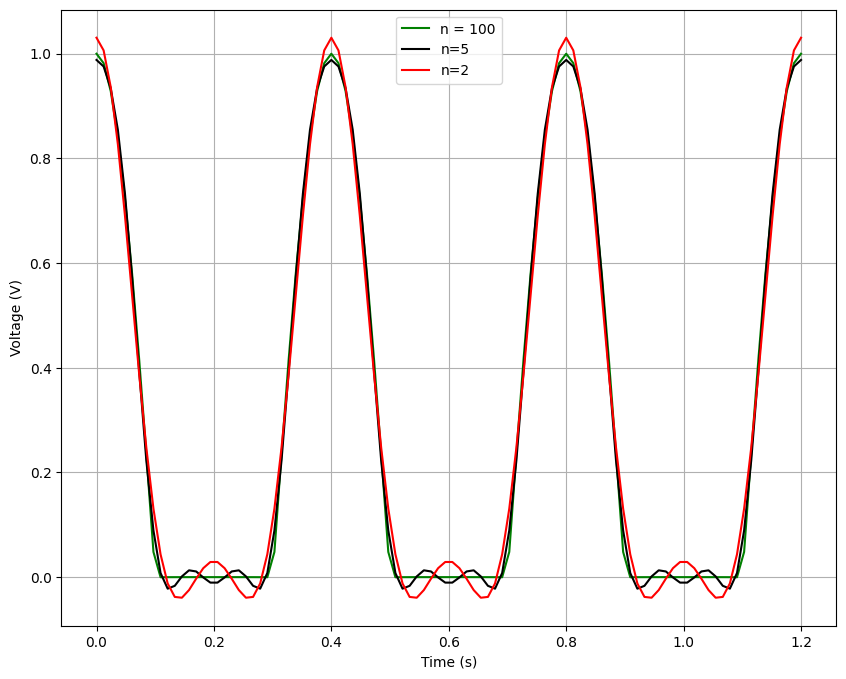

In [35]:
def v(t, n):
    ans = 1/np.pi
    for i in range(1,n + 1):
        ans += coefficient(i) * np.cos(np.pi * 5 * i * t)
    return ans    

def coefficient(i):
    if i == 1:
        return 1/2
    else:
        return 2/np.pi * np.cos(np.pi * i / 2)/ (1 - i ** 2)
t_period = np.linspace(0, 1.2, 100)
V100 = [v(i , 100) for i in t_period]
V5 = [v(i, 5) for i in t_period]
V2 = [v(i, 2) for i in t_period]
plt.figure(figsize=(10, 8))
plt.plot(t_period, V100, color='green', label='n = 100')
plt.plot(t_period, V5, color='black', label='n=5')
plt.plot(t_period, V2 , color='red',label='n=2')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.legend()
plt.show()


As you can see the more terms included, the more the plot resembels the original waveform.



**Applying above wave to a serial RLC circuit as bellow**

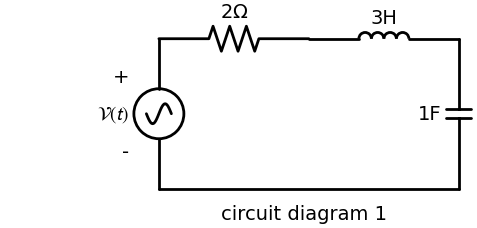

In [4]:
with schemdraw.Drawing() as d:
    elm.SourceSin().label(['-', r'$\mathcal{V(t)}$', '+'])
    elm.Resistor().label(r'$2\Omega$').right()
    elm.Inductor().label('3H')
    elm.Capacitor().label('1F').down()
    elm.Line().length(d.unit * 2).left()
    d.here = (d.here[0] + d.unit, d.here[1] - 0.4)
    elm.Label('circuit diagram 1')

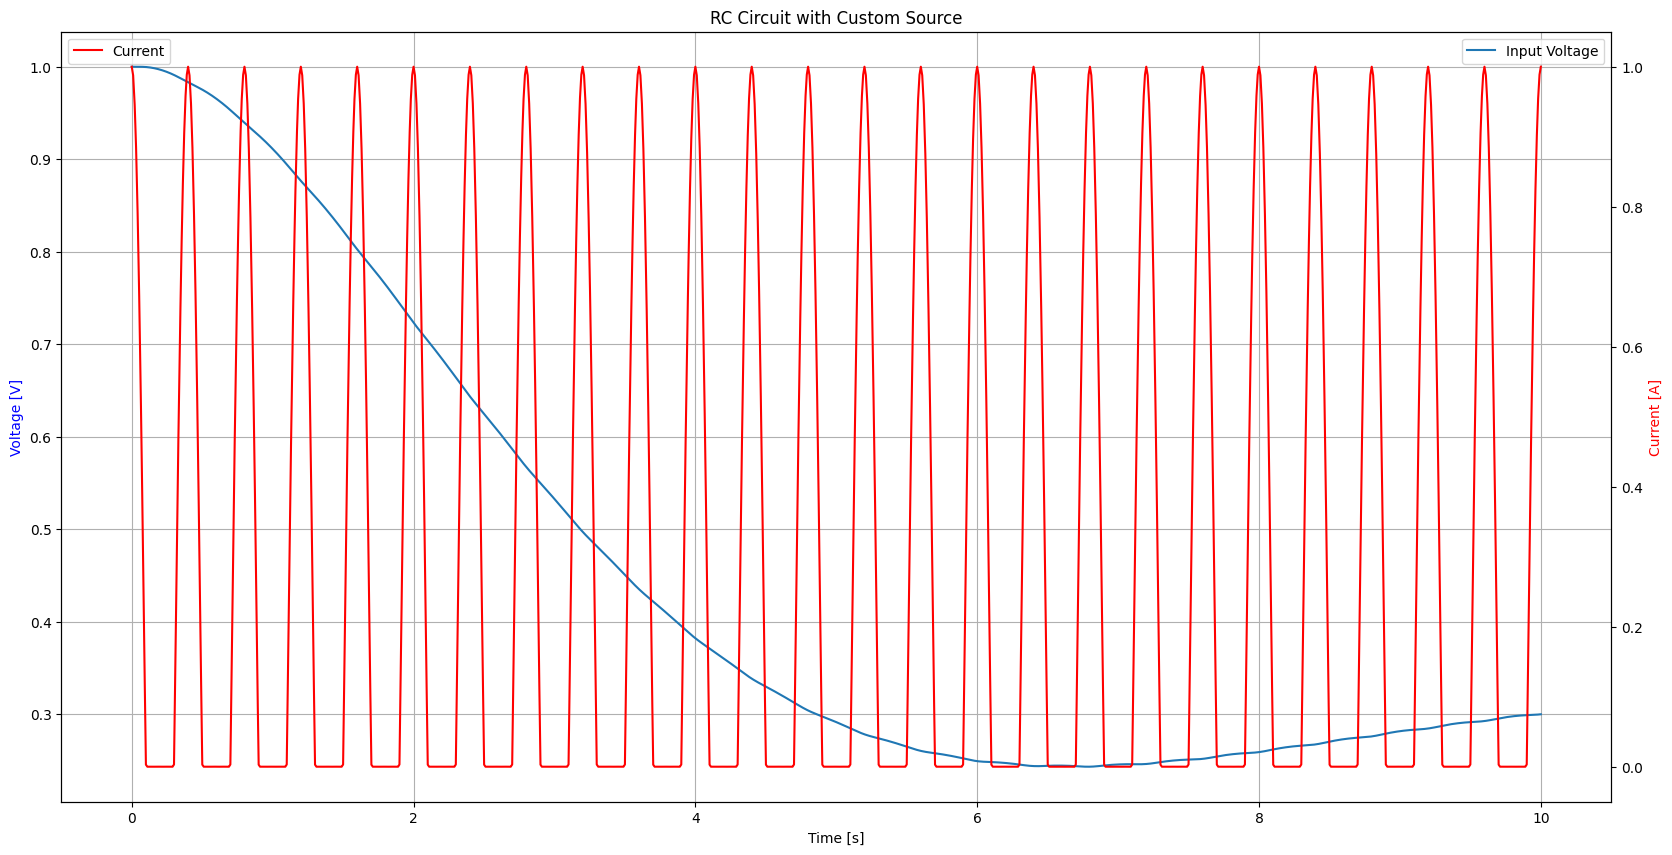

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
#from PySpice.Spice.Simulation import Transient
from PySpice.Probe.Plot import plot

# Define the circuit
circuit = Circuit('RC Circuit with Custom Source')

# Define a time-dependent voltage source
def custom_waveform(t):
    return v(t, 100)


def v(t, n):
    ans = 1/np.pi
    for i in range(1,n + 1):
        ans += coefficient(i) * np.cos(np.pi * 5 * i * t)
    return ans    


def coefficient(i):
    if i == 1:
        return 1/2
    else:
        return 2/np.pi * np.cos(np.pi * i / 2)/ (1 - i ** 2)


# Add the custom voltage source using a PWL approximation
time_points = np.arange(0, 100, 1e-2)  # time from 0 to 10ms in 10us steps
voltage_points = [custom_waveform(t) for t in time_points]

circuit.V(1, 'input', circuit.gnd, 'PWL(' + ' '.join(f'{t} {v}' for t, v in zip(time_points, voltage_points)) + ')')

# Add components
circuit.R(1, 'input', 'a', 2 @ u_Ω)
circuit.L(1, 'a', 'b', 3 @ u_H)
circuit.C(1, 'b', circuit.gnd, 1 @ u_F)

simulator = circuit.simulator(temperature=25, nominal_temperaure=25)
analysis = simulator.transient(step_time=0.01 @ u_s, end_time= 10000 @ u_ms)

figure, axe = plt.subplots(figsize=(20, 10))

# Plot input voltage
axe.plot(analysis.time, analysis['b'])
axe.set_xlabel('Time [s]')
axe.set_ylabel('Voltage [V]', color='blue')
axe.legend(['Input Voltage'], loc='upper right')
axe.grid()

# Add a secondary y-axis for current
axe_current = axe.twinx()

# Calculate and plot current (I = V/R for a simple resistor, use voltage drop for more complex circuits)
voltage_across_resistor = analysis['input'] - analysis['a']
current_through_resistor = voltage_across_resistor / 2  # R = 2Ω`
axe_current.plot(analysis.time, analysis['input'], color='red')
axe_current.set_ylabel('Current [A]', color='red')
axe_current.legend(['Current'], loc='upper left')



plt.title('RC Circuit with Custom Source')
plt.show()

#### Symmetry and it's application in Fourier Transform Analysis

Sometimes by considering symmetry of a functions it's more straight forward to find Fourier Transform of a function, it even may help us find transformation of a non sinsusoidal wave as shown in bellow.

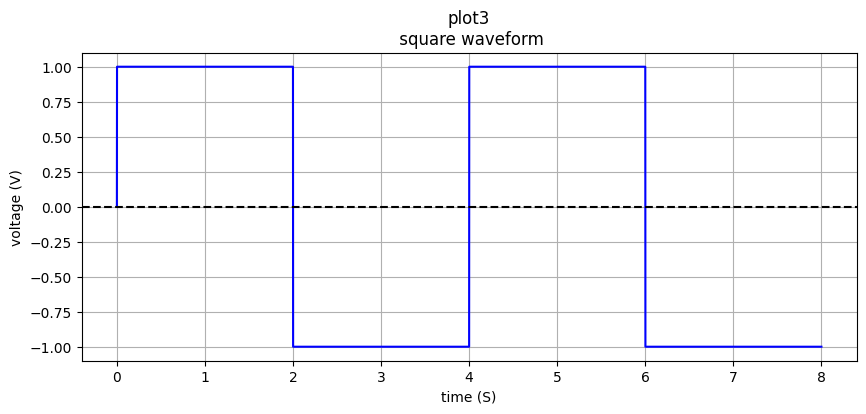

In [53]:
T = 2
t = np.linspace(0, 4 * T, 10000)
v = np.sign(np.sin(np.pi / T * t))

#configuring the plot
plt.figure(figsize=(10, 4))
plt.plot(t, v, color='blue')
plt.title('plot3\n square waveform')
plt.xlabel('time (S)')
plt.ylabel('voltage (V)')
plt.axhline(color='black', linestyle='--')
plt.grid()
plt.show()

##### Odd Symmetry:

Funciton $\text{ } f(t) $ possesses the property of odd symmetry if
$$
f(t) = -f(-t)
$$
plot4 shows such functions.
$$
\text{finding } a_0: 
$$
$$
    a_0 = \frac{\int_{-\frac{T}{2}}^{\frac{T}{2}}}{f(t)dt}
$$
$$
    a_0 = \frac{-\int_{0}^{\frac{T}{2}}f(t)dt + \int_{0}^{\frac{T}{2}}f(t)dt}{T} 
$$
$$
a_0 = 0
$$
$$
    \text{finding } a_k:
$$
    
$$
    \text{from eq[7] we have: } a_k = \frac{2}{T}[\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)\cos{k\omega t}dt]
$$

$$
    a_k = \frac{2}{T}[-\int_{0}^{-\frac{T}{2}}f(t)\cos{k\omega t}dt + \int_{0}^{\frac{T}{2}}f(t)\cos{k\omega t}dt]
$$
$$
    f(t) = -f(-t) \rightarrow a_k = \frac{2}{T}[-\int_{0}^{\frac{T}{2}}f(u)\cos{k\omega u}du + \int_{0}^{\frac{T}{2}}f(t)\cos{k\omega t}dt]
$$
$$
    a_k = 0
$$
$$
\text{   findding } b_k:
$$
$$
    f(t) = \Sigma_{n = 1}^{\infty}b_n\sin{n\omega t}
$$
$$
    \int_{0}^{T}f(t)sin(k\omega t)dt = \int_{0}^{T}\sin{k\omega t}\Sigma_{n = 1}^{\infty}b_n\sin{n\omega t}
$$
$$
    \text{     knowing }  \int_{0}^{T}\sin{k\omega t}\sin{n\omega t}dt = 0 \text{ for } n \neq k
$$
$$
    \int_{0}^{T}f(t)\sin{k\omega t}dt = b_k\int_{0}^{T}\sin^{2}{k \omega t}dt
$$
$$
    \text{  assuming } u = t - \frac{T}{2} we have: \int_{-\frac{T}{2}}^{\frac{T}{2}}f(u + \frac{T}{2})\sin{k\omega (u + \frac{T}{2})}du = b_k\frac{T}{2}
$$
$$
    b_k = \frac{2}{T}[\int_{-\frac{T}{2}}^{0}\sin{k\omega (u + \frac{T}{2})}f(u + \frac{T}{2})du + \int_{0}^{\frac{T}{2}}\sin{k\omega (u + \frac{T}{2})}f(u + \frac{T}{2})du] 
$$
$$
\text{    in the first integral we assume } z = -u: 
$$
$$
            b_k = \frac{2}{T}[-\int_{-\frac{T}{2}}^{0}\sin{k\omega (-z + \frac{T}{2})}f(-z + \frac{T}{2})dz + \int_{0}^{\frac{T}{2}}\sin{k\omega (u + \frac{T}{2})}f(u + \frac{T}{2})du]
$$
$$
    \text{     f(t) is a periodic function, so} f(t) = f(t \pm T) 
$$
$$
                b_k = \frac{2}{T}[\int_{0}^{\frac{T}{2}}\sin{k\omega (-z - \frac{T}{2})}f(-z - \frac{T}{2})dz + \int_{0}^{\frac{T}{2}}\sin{k\omega (u + \frac{T}{2})}f(u + \frac{T}{2})du]
$$
$$
     \text{f(t) is an odd function so f(t) = -f(-t), }\sin \text{is an odd function too} 
$$
$$ 
                    b_k = \frac{2}{T}[\int_{0}^{\frac{T}{2}}\sin{k\omega (z + \frac{T}{2})}f(z + \frac{T}{2})dz + \int_{0}^{\frac{T}{2}}\sin{k\omega (u + \frac{T}{2})}f(u + \frac{T}{2})du]
$$
$$
        \text{   z and u are just symbols so we have: }
$$
$$
                        b_k = \frac{4}{T}[\int_{0}^{\frac{T}{2}}\sin{k\omega (z + \frac{T}{2})}f(z + \frac{T}{2})dz]
$$
$$
                         eq[9]:\quad   b_k = \frac{4}{T}[\int_{\frac{T}{2}}^{T}\sin{k\omega (t)}f(t)dt]
$$

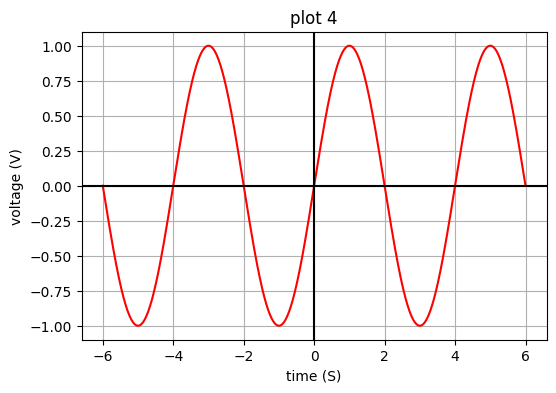

In [62]:
T = 2
t = np.linspace(-6, 6, 1000)
v = np.sin(np.pi / T * t)

plt.figure(figsize=(6, 4))
plt.plot(t, v, color='red')
plt.grid()
plt.xlabel('time (S)')
plt.ylabel('voltage (V)')
plt.title('plot 4')
plt.axhline(linestyle='-', color='black')
plt.axvline(linestyle='-', color='black')
plt.show()

##### Even Symmetry:


A function possesses property of even symmetry if
$$ 
f(t) = f(-t)
$$
plot5 shows an example of this kind.

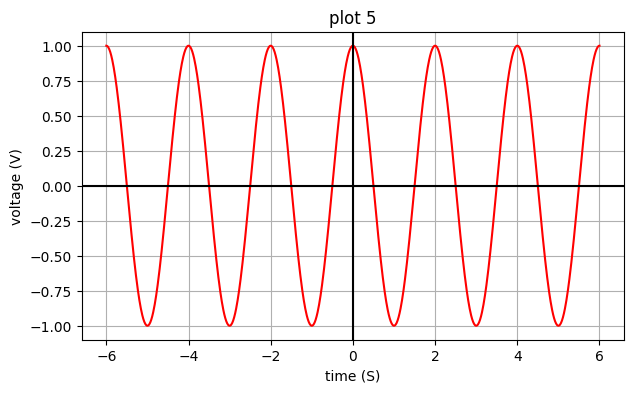

In [64]:
T = 2
t = np.linspace(-6, 6, 1000)
v = np.cos(2 * np.pi / T * t)

plt.figure(figsize=(7, 4))
plt.plot(t, v, color='red')
plt.xlabel('time (S)')
plt.ylabel('voltage (V)')
plt.title('plot 5')
plt.axhline(linestyle='-', color='black')
plt.axvline(linestyle='-', color='black')
plt.grid()
plt.show()

$$
    eq[10]: a_0 = \frac{2}{T}\int_{0}^{\frac{T}{2}}f(t)dt
$$
$$
    eq[11]: a_k = \frac{4}{T}\int_{0}^{\frac{T}{2}}f(t)\cos{k\omega t}dt
$$
$$
    b_k = 0
$$
###### proof of eq[10] and eq[11] is similiar to proof of eq[9].

##### Half-Wave Symmetry:

A function has this property if 
$$
f(t) = -f(t - \frac{T}{2})
$$
$$
\text{or, equally}
$$
$$
f(t) = -f(t + \frac{T}{2})
$$
plot6 is an example of this kind of functions.

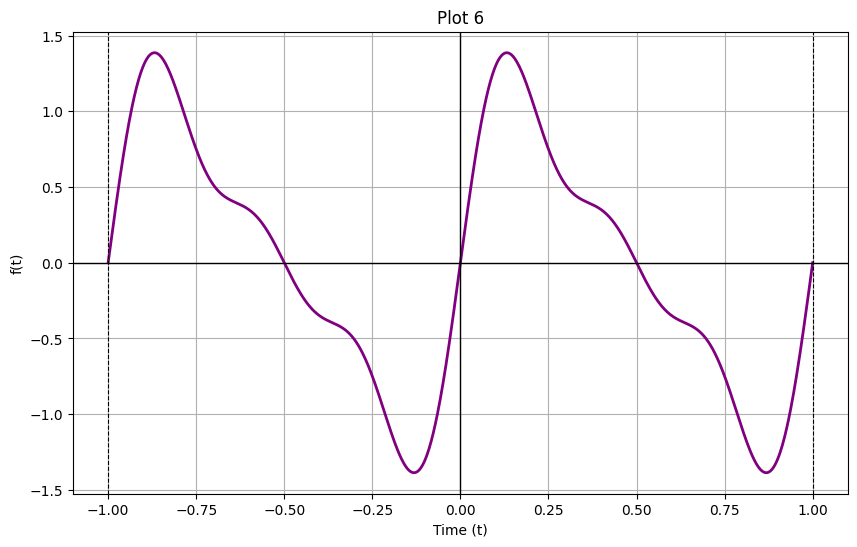

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
T = 1.0  # Period of the waveform
t = np.linspace(-T, T, 1000)  # Time vector for one period centered around 0

# Create a custom waveform using a combination of sine waves
# Adjust the coefficients and frequencies to match the pattern in the image
y = (np.sin(2 * np.pi * t / T) +
     0.5 * np.sin(4 * np.pi * t / T) +
     0.25 * np.sin(6 * np.pi * t / T))

# Plot the waveform
plt.figure(figsize=(10, 6))
plt.plot(t, y, color='purple', linewidth=2)
plt.title('Plot 6')
plt.xlabel('Time (t)')
plt.ylabel('f(t)')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.axvline(-T, color='black', linestyle='--', linewidth=0.8)
plt.axvline(T, color='black', linestyle='--', linewidth=0.8)
plt.grid(True)
plt.show()



$$
eq[12]\quad a_n = 
\begin{cases}
\frac{4}{T}\int_{0}^{\frac{T}{2}}f(t)\cos{n\omega t}dt &\text{n odd} \\
0 &\text{n even}
\end{cases}
$$
$$
eq[13]\quad b_n =
\begin{cases}
    \frac{4}{T}\int_{0}^{\frac{T}{2}}f(t)\sin{n\omega t}dt &\text{n odd} \\
0 &\text{n even}
\end{cases}
$$

Sometimes a function is has property of both odd symmetry and Half-Wave symmetry then:
$$
a_n = 0\quad \text{for all n}
$$
$$
eq[14]\quad b_n =
\begin{cases}
    \frac{8}{T}\int_{0}^{\frac{T}{4}}f(t)\sin{n\omega t}dt &\text{n odd} \\
0 &\text{n even}
\end{cases}
$$
Also it may have Half-Wave summetry along with even symmetry:
$$
b_n = 0\quad \text{for all n}
$$
$$
eq[15]\quad a_n =
\begin{cases}
    \frac{8}{T}\int_{0}^{\frac{T}{4}}f(t)\cos{n\omega t}dt &\text{n odd} \\
0 &\text{n even}
\end{cases}
$$

#### Example3: Find i(t) for citcuit shown in Circuit Diagram 2 with $v_s(t)$ shown in plot 7.(there is no initial current in the circuit.)

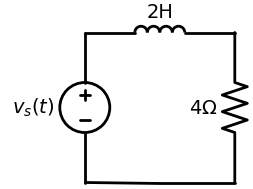

In [7]:
with schemdraw.Drawing() as d:
    elm.SourceV().label(r'$v_s(t)$')
    elm.Inductor().label('2H').right()
    elm.Resistor().down().label(r'$4\Omega$')
    elm.Line().left()
    

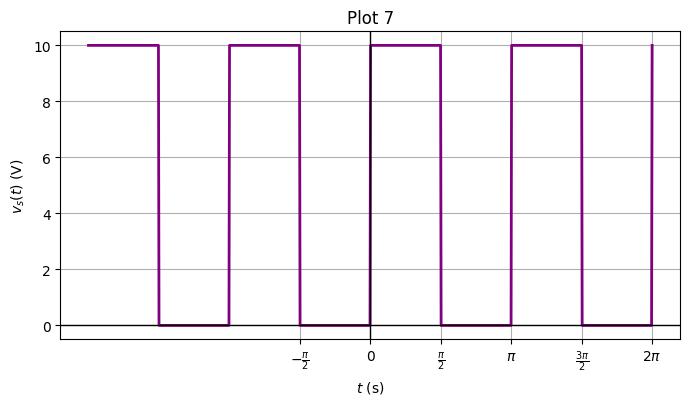

In [8]:
# Define the parameters for the square wave
T = np.pi  # Period of the square wave
V_max = 10  # Maximum voltage
t = np.linspace(-2 * np.pi, 2*np.pi, 1000)  # Time vector covering from -π/2 to 2π

# Create the square wave values
y = V_max * ((t % T) < (T / 2))

# Plot the square waveform
plt.figure(figsize=(8, 4))
plt.plot(t, y, color='purple', linewidth=2)
plt.title(r'Plot 7')
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$v_s(t)$ (V)')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xticks([-np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.grid(True)
plt.show()


firt assume $f(t) = v(t) - 5$

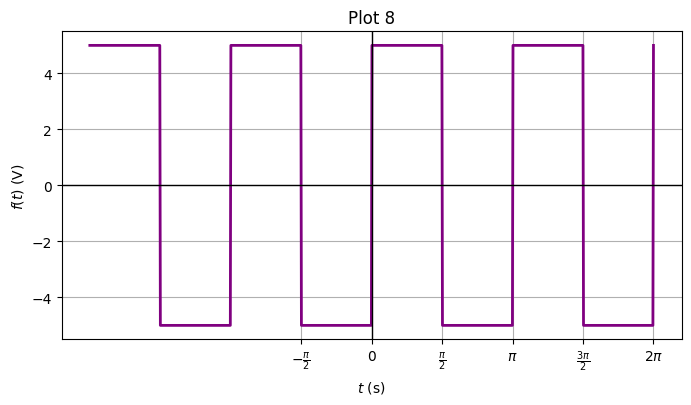

In [3]:
# Define the parameters for the square wave
T = np.pi  # Period of the square wave
V_max = 10  # Maximum voltage
t = np.linspace(-2 * np.pi, 2*np.pi, 1000)  # Time vector covering from -π/2 to 2π

# Create the square wave values
y = V_max * ((t % T) < (T / 2))
y = y - 5
# Plot the square waveform
plt.figure(figsize=(8, 4))
plt.plot(t, y, color='purple', linewidth=2)
plt.title(r'Plot 8')
plt.xlabel(r'$t$ (s)')
plt.ylabel(r'$f(t)$ (V)')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.xticks([-np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi],
           [r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.grid(True)
plt.show()

##### $f(t)$ is an odd function, it also is a Half-Wave Function so:
$$
\begin{cases}
a_n = 0 &\text{ all n} \\
b_n = \frac{8}{T}\int_{0}^{\frac{T}{4}}\sin{n\omega_0 t}f(t)dt &\text{odd n}
\end{cases}
$$
$$
b_n = \frac{8}{\pi}\int_{0}^{\frac{\pi}{4}}f(t)\sin{n\omega_0 t}dt
$$
$$
\text{for  }  < t < \frac{\pi}{4} \text{  :   }\quad f(t) = 5
$$
$$
    b_n = \frac{8}{\pi}\int_{0}^{\frac{\pi}{4}}5\sin{2n t}dt = \frac{40}{\pi}\frac{1}{2n} = \frac{20}{\pi n}
$$
##### So we can write $f(t)$ as
$$
    f(t) = \frac{20}{\pi}\Sigma_{n = 1(odd)}^{\infty}\frac{\sin{2nt}}{n}
$$
##### thus
$$
v(t) = 5 + f(t) = \frac{20}{\pi}\Sigma_{n = 1(odd)}^{\infty}\frac{\sin{2nt}}{n}
$$
$$
v(t) = 5 +\frac{20}{\pi}\Sigma_{n = 1(odd)}^{\infty}\frac{\sin{2nt}}{n}
$$
##### As you can see in Plot 9, our answer for $v_s(t)$ is quit the same as Plot 7.

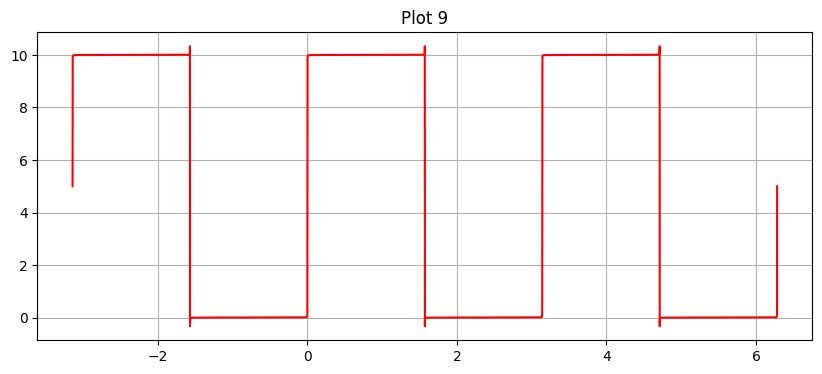

In [4]:
def v(t, i):
    if i == 0:
        return 5
    else:
        ans = 5
        for j in range(1, i + 1, 2):
            ans += 20 / (j * np.pi) * np.sin(2 * j * t)
    return ans
t = np.linspace(-np.pi, 2 * np.pi, 10000)
Vs = [v(i,10000) for i in t]

plt.figure(figsize=(10, 4))
plt.plot(t, Vs, color='red')
plt.grid()
plt.title('Plot 9')
plt.show()

##### now we do a simple KVL on our circuit:
$$ 
    \text {by super position law we have:}
$$
$$
\begin{aligned}
    &\text{for DC part of} V_S(t) \text{and sparing natural response}: \\
    & \hspace{3cm} i(t) = \frac{5}{4} = 1.25
\end{aligned}
$$
$$
\begin{aligned}
    &\text{for (i)th ac part:} \\
    & \hspace{3cm} v_i(t) = \frac{20}{\pi i} \sin{2it} \\
    & \hspace{2cm} \text{by complex frequency technique:}\\
    & \hspace{3cm} V_i = V_m e^{2it - \frac{pi}{2}} \text{, } V_m = \frac{20}{\pi i}
\end{aligned}
$$

$$
\begin{aligned}
    &\hspace{3cm} \text{now doing a simple KVL around our circuit:}\\
    &\hspace{4cm} I_i = \frac{V_m e^{-\frac{\pi}{2}}}{4 + 4ij} \\
    &\hspace{3cm} \text{for ac part we achieved:}\\ 
    &\hspace{3cm} I = \Sigma_{i = 1(odd)}^{\infty}I_i = \frac{V_m e^{-\frac{\pi}{2}}}{4 + 4ij}  
\end{aligned}
$$

#### Complex form of Fourier Transform

In this part I introduce a representation of Fourier Transform which is more easy to work with and helps us for better analysis of a wave. lets start with some basics:
$$
\begin{aligned}
    e^{\theta j} = \cos{\theta} + j\sin{\theta} \\
    \cos{\theta} = \frac{e^{\theta j} + e^{-\theta j}}{2} \\
    \sin{\theta} = \frac{e^{\theta j} - e^{-\theta j}}{2j} \\ 
\end{aligned}
$$
triangular form of Fourier Transform:
$$
\begin{aligned}
    f(t) = a_0 + \Sigma_{n = 1}^{\infty}(a_n\cos{n\omega t} + b_n\sin{n\omega t}) \\
\end{aligned}
$$
substitute exponential forms for sin and cosine, after rearanging we get:
$$
\begin{aligned}
    f(t) = a_0 + \Sigma_{n = 1}^{\infty} (e^{nw_0jt\frac{a_n - jb_n}{2}} + e^{-nw_0jt}\frac{a_n + jb_n}{2})
\end{aligned}
$$
Now consider $c_n = \frac{a_n - jb_n}{2}$ substitute -n for n we get $c_{-n} = \frac{a_n + jb_n}{2}$ so $c_n = c_n^{*}$.
$$
\begin{aligned}
 &f(t) = c_0 + \Sigma_{n = 1}^{\infty}c_ne^{nw_0jt} + \Sigma_{n = -\infty}^{-1} c_ne^{nw_0jt} 
\\ &f(t) = \Sigma_{n = -\infty}^{+\infty} c_ne^{nw_0jt}
\end{aligned}
$$
substitute triangular form of finding $a_n$ and $b_n$ we found:
$$
\begin{aligned}
    &c_n = \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}} f(t)\cos{n\omega_0t}dt -\frac{1}{T}j\int_{-T/2}^{T/2}f(t)\sin{n\omega_0t}dt
    \\&c_n = \frac{1}{T}\int_{-\frac{T}{2}}^{\frac{T}{2}}f(t)e^{-jn\omega_0t}dt
\end{aligned}
$$

#### Definition of Fourier Transform

Analyzed periodic functions until now, all resulted in Fourier Series and their frequencies were discrete. But  not all functions are periodic, rectangular pulse, a step function,  a ramp function and impulse function ,that I delve into it,  are examples of such signals. Bellow diagram shows examples of this signals.

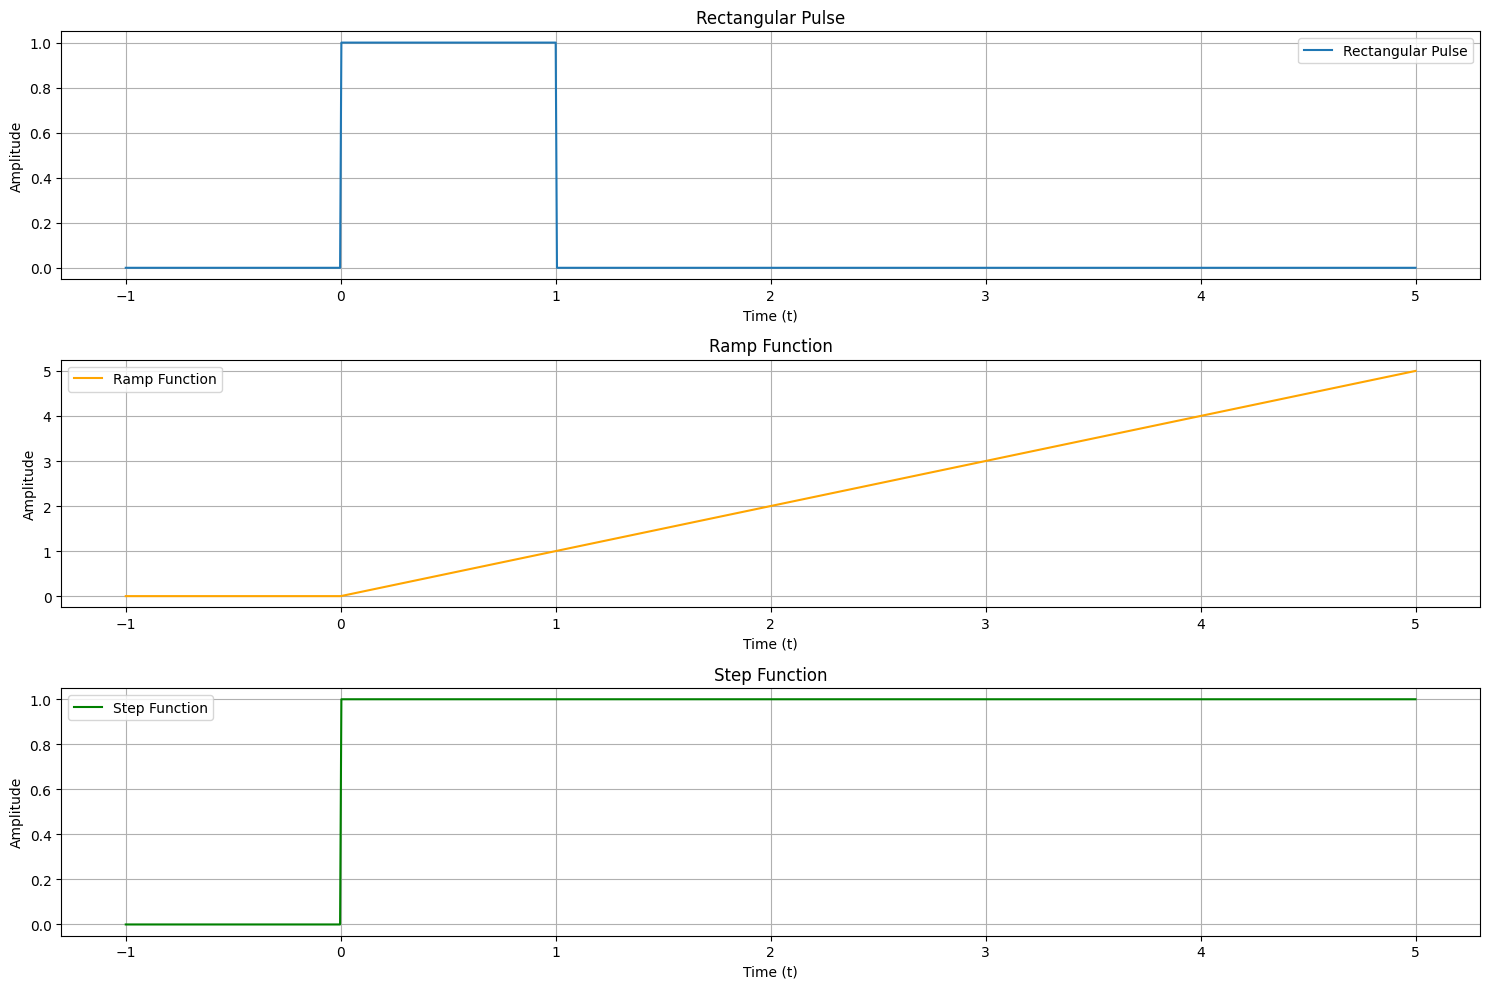

In [8]:
# Define time range
t = np.linspace(-1, 5, 1000)

# Define rectangular pulse function
def rectangular_pulse(t):
    return np.where((t >= 0) & (t <= 1), 1, 0)

# Define ramp function
def ramp_function(t):
    return np.where(t >= 0, t, 0)

# Define step function
def step_function(t):
    return np.where(t >= 0, 1, 0)

# Create plots
plt.figure(figsize=(15, 10))

# Plot rectangular pulse
plt.subplot(3, 1, 1)
plt.plot(t, rectangular_pulse(t), label='Rectangular Pulse')
plt.title('Rectangular Pulse')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot ramp function
plt.subplot(3, 1, 2)
plt.plot(t, ramp_function(t), label='Ramp Function', color='orange')
plt.title('Ramp Function')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot step function
plt.subplot(3, 1, 3)
plt.plot(t, step_function(t), label='Step Function', color='green')
plt.title('Step Function')
plt.xlabel('Time (t)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Now we start achieving the definition, first rearange a known  relations.
$$
\begin{aligned}
    &c_n = \frac{1}{T}\int_{-\frac{T}{2}}^{+\frac{T}{2}}f(t)e^{-nwjt}dt \\
    &c_nT = \int_{-\frac{T}{2}}^{+\frac{T}{2}}f(t)e^{-nwjt}dt
\end{aligned}
$$
for a non periodic function we can imagine $T \rightarrow \infty$ and we know $ w_0 = \frac{2\pi}{T} \Rightarrow (w_0 \rightarrow dw)$. 
$$
\begin{aligned}
    &c_nT \rightarrow \int_{-\infty}^{+\infty}f(t)e^{wjt}dt
\end{aligned}
$$
 Right hand side of above function is a function of $\omega$ not t so
$$
    F(\omega j) = \int_{-\infty}^{+\infty}f(t)e^{wjt}dt
$$
Now focus on $ f(t) = \Sigma_{-\infty}^{+\infty}c_ne^{n\omega_0jt}$, multiply by $\frac{T}{T}$ we get:
$$
    f(t) = \frac{1}{2\pi}\int_{-\infty}^{+\infty}F(\omega j)e^{\omega j}d\omega
$$
Bellow functions are called Fourier Transform pair:
$$
\begin{aligned}
    &\text{Fourier Transform of f(t): } F(\omega j) = \int_{-\infty}^{+\infty}f(t)e^{wjt}dt
    \\& \text{Inverse Fourier Transform of } F(\omega j) \text{ : } f(t) =  \frac{1}{2\pi}\int_{-\infty}^{+\infty}F(\omega j)e^{\omega j}d\omega
\end{aligned}
$$
Now that we have an idea about what is laplace transform, it's time to dive deeper. In this section I provid you with simple but very important relations that we use them to analyse citcuits. Proofs are provided in part 5th.

### Laplace, Introduction

Just as the Fourier transform helps us understand signal behavior in the frequency domain, the Laplace transform extends this concept, providing a more general framework that includes exponential growth and decay. This makes it particularly useful for analyzing transient responses in circuits, as well as for designing and understanding systems that require stability and control.

In this section, we will explore the fundamentals of the Laplace transform, its properties, and how it can be applied to solve circuit equations. By mastering the Laplace transform, we gain a powerful method to analyze and design complex electrical circuits with greater ease and insight.

$$
    F(s) = L[f(t)] = \int_{-\infty}^{-\infty}e^{-st}f(t)dt
$$
here 's', as explained, is the more general form of the frequency domin $s = \omega j+ \sigma$ . 

  Similar to the Fourier Transform, which establishes a unique correspondence between a time-domain function $f(t)$
and its frequency-domain representation F(ω), the Laplace Transform also exhibits this uniqueness. Each time-domain function 
f(t) has a unique Laplace transform F(s), resulting in distinct pairs (f(t),F(s)). Bellow is the inverse laplace transform.

$$
    f(t) = \frac{1}{2\pi j}\int_{-\infty}^{+\infty}e^{st}F(s)ds
$$

### Properties of the Laplace Transform

The Laplace transform is a powerful tool in analyzing linear time-invariant (LTI) systems, and its properties are essential for simplifying complex problems. Let $ f(t) $ and $ g(t) $ be piecewise continuous functions, and let $ c_1 $ and $ c_2 $ be constants. Below are the fundamental properties of the Laplace transform along with their proofs:

#### Linearity Property
$$
\mathcal{L}\{c_1 f(t) + c_2 g(t)\} = c_1 \mathcal{L}\{f(t)\} + c_2 \mathcal{L}\{g(t)\}
$$
**Proof**:
 
\begin{aligned}
\mathcal{L}\{c_1 f(t) + c_2 g(t)\} &= \int_{0}^{\infty} e^{-st} (c_1 f(t) + c_2 g(t)) \, dt \\
&= \int_{0}^{\infty} (c_1 e^{-st} f(t) + c_2 e^{-st} g(t)) \, dt \\
&= c_1 \int_{0}^{\infty} e^{-st} f(t) \, dt + c_2 \int_{0}^{\infty} e^{-st} g(t) \, dt \\
&= c_1 \mathcal{L}\{f(t)\} + c_2 \mathcal{L}\{g(t)\}.
\end{aligned}


#### Existence Criterion
A function $F(s)$can be the result of a Laplace transform if:
$$
\lim_{s \to \infty} F(s) = 0
$$

#### Scaling in the Time Domain
$$
\mathcal{L}\{f(at)\} = \frac{1}{a} F\left(\frac{s}{a}\right)
$$

**Proof**: 
\begin{aligned}
\mathcal{L}\{f(at)\} &= \int_{0}^{\infty} e^{-st} f(at) \, dt \\
&= \int_{0}^{\infty} e^{-st} f(u) \, \frac{du}{a} \quad \text{(let } u = at \text{, so } dt = \frac{du}{a}) \\
&= \frac{1}{a} \int_{0}^{\infty} e^{-\frac{s}{a} u} f(u) \, du \\
&= \frac{1}{a} F\left(\frac{s}{a}\right).
\end{aligned}


#### Differentiation in the Time Domain
$$
\mathcal{L}\{f^{(n)}(t)\} = s^n \mathcal{L}\{f(t)\} - s^{n-1} f(0) - s^{n-2} f'(0) - \cdots - s f^{(n-2)}(0) - f^{(n-1)}(0)
$$
**Proof for \( n = 1 \)**:
\begin{aligned}
\mathcal{L}\{f'(t)\} &= \int_{0}^{\infty} e^{-st} f'(t) \, dt \\
&= \left[ e^{-st} f(t) \right]_{0}^{\infty} + s \int_{0}^{\infty} e^{-st} f(t) \, dt \\
&= - f(0) + s F(s) \quad (\text{assuming } f(t) \text{ decays to } 0 \text{ as } t \to \infty) \\
&= s F(s) - f(0).
\end{aligned}

The proof for higher-order derivatives follows similarly by induction.

#### Multiplication by $t^n$ 
$$
\mathcal{L}\{t^n f(t)\} = (-1)^n \frac{d^n}{ds^n} F(s)
$$

**Proof**:
Using the property of differentiation under the integral sign (Feynman's technique):

\begin{aligned}
\mathcal{L}\{t f(t)\} &= -\frac{d}{ds} \int_{0}^{\infty} e^{-st} f(t) \, dt \\
&= -\frac{d}{ds} F(s).
\end{aligned}

By induction, this extends to higher powers of $t$.

#### Integration in the Time Domain
$$
\mathcal{L}\left\{\int_{0}^{t} f(\tau) \, d\tau \right\} = \frac{1}{s} F(s)
$$
**Proof**: 
\begin{aligned}
\mathcal{L}\left\{\int_{0}^{t} f(\tau) \, d\tau \right\} &= \int_{0}^{\infty} e^{-st} \left( \int_{0}^{t} f(\tau) \, d\tau \right) \, dt \\
&= \frac{1}{s} \int_{0}^{\infty} e^{-st} f(t) \, dt \quad (\text{by integration by parts}) \\
&= \frac{1}{s} F(s).
\end{aligned}


#### Division by $t$
$$
\mathcal{L}\left\{\frac{f(t)}{t}\right\} = \int_{s}^{\infty} F(\sigma) \, d\sigma
$$

**Proof**:
Using the integral representation of the Laplace transform: 
\begin{aligned}
\mathcal{L}\left\{\frac{f(t)}{t}\right\} &= \int_{0}^{\infty} e^{-st} \frac{f(t)}{t} \, dt \\
&= \int_{s}^{\infty} F(\sigma) \, d\sigma \quad (\text{using the definition of the inverse Laplace transform}).
\end{aligned}

#### Time Shifting
$$
\mathcal{L}\{f(t - a) u(t - a)\} = e^{-sa} F(s)
$$
**Proof**:
\begin{aligned}
\mathcal{L}\{f(t - a) u(t - a)\} &= \int_{0}^{\infty} e^{-st} f(t - a) u(t - a) \, dt \\
&= \int_{a}^{\infty} e^{-st} f(t - a) \, dt \\
&= e^{-sa} \int_{0}^{\infty} e^{-s\tau} f(\tau) \, d\tau \quad (\text{let } \tau = t - a) \\
&= e^{-sa} F(s).
\end{aligned}

These properties form the foundation for using the Laplace transform in solving differential equations, analyzing system responses, and simplifying circuit analysis.


### Common Laplace Transforms 


In circuit analysis, several functions frequently appear, and their Laplace transforms are essential for solving circuit equations. Below, we introduce these common functions and their Laplace transforms.

#### 1. Unit Step Function $ u(t) $ 

The unit step function is defined as:
$$
u(t) = \begin{cases} 
0 & \text{for } t < 0 \\
1 & \text{for } t \geq 0 
\end{cases}
$$

**Laplace Transform**:
$$
\mathcal{L}\{u(t)\} = \int_{0}^{\infty} e^{-st} \cdot 1 \, dt = \frac{1}{s}, \quad \Re(s) > 0 
$$

#### 2. Delta Function $delta(t)$

The delta function, also known as the Dirac delta function, is defined as:
$$
\delta(t) = \begin{cases} 
\infty & \text{for } t = 0 \\
0 & \text{for } t \neq 0 
\end{cases}
such that
 \int_{-\infty}^{\infty} \delta(t) \, dt = 1 
$$
**Laplace Transform**:
$$
\mathcal{L}\{\delta(t)\} = 1
$$
#### 3. Exponential Function $e^{at}$

The exponential function is defined as:
$$
f(t) = e^{at}, \quad a \text{ is a constant} 
$$
**Laplace Transform**:
$$
\mathcal{L}\{e^{at}\} = \int_{0}^{\infty} e^{-st} e^{at} \, dt = \int_{0}^{\infty} e^{-(s-a)t} \, dt = \frac{1}{s-a}, \quad \Re(s) > \Re(a)
$$
#### 4. Sine Function $\sin(\omega t)$

The sine function is defined as:
$$
f(t) = \sin(\omega t) 
$$
**Laplace Transform**:
$$
\mathcal{L}\{\sin(\omega t)\} = \int_{0}^{\infty} e^{-st} \sin(\omega t) \, dt = \frac{\omega}{s^2 + \omega^2}, \quad \Re(s) > 0 
$$
#### 5. Cosine Function $\cos(\omega t)$

The cosine function is defined as:
$$
f(t) = \cos(\omega t)
$$
**Laplace Transform**:
$$
\mathcal{L}\{\cos(\omega t)\} = \int_{0}^{\infty} e^{-st} \cos(\omega t) \, dt = \frac{s}{s^2 + \omega^2}, \quad \Re(s) > 0
$$
#### 6. Ramp Function $( t )$

The ramp function is defined as:
$$
f(t) = t 
$$
**Laplace Transform**:
$$
\mathcal{L}\{t\} = \int_{0}^{\infty} e^{-st} t \, dt = \frac{1}{s^2}, \quad \Re(s) > 0 
$$
#### 7. Parabolic Function $( t^2 )$

The parabolic function is defined as:
$$
f(t) = t^2
$$
**Laplace Transform**:
$$
\mathcal{L}\{t^2\} = \int_{0}^{\infty} e^{-st} t^2 \, dt = \frac{2}{s^3}, \quad \Re(s) > 0
$$
#### 8. General Polynomial Function $( t^n )$

For a general polynomial function \( t^n \), the Laplace transform is given by:
$$
f(t) = t^n, \quad n \text{ is a positive integer}
$$
**Laplace Transform**:
$$
\mathcal{L}\{t^n\} = \int_{0}^{\infty} e^{-st} t^n \, dt = \frac{n!}{s^{n+1}}, \quad \Re(s) > 0 
$$
These fundamental transforms form the basis for analyzing more complex functions and systems in circuit analysis. By leveraging these transforms, engineers can efficiently solve for circuit responses in both the time and frequency domains.


## Part 2

### Impedance and Admitance in S-Domain

Impedance and Admitance are terms from Phasor Analysis, which is an special case of complex frequency so it's natural to have this terms in S-Domain too but with some changes.

#### Resistor:


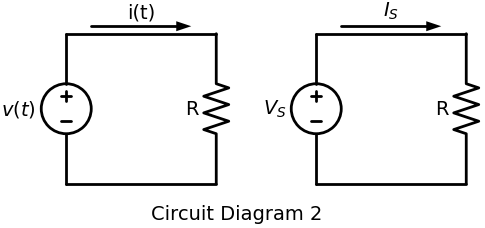

In [14]:
with schemdraw.Drawing() as d:
    elm.SourceV().label(r'$v(t)$')
    l = elm.Line().right()
    elm.CurrentLabel().label('i(t)').at(l)
    elm.Resistor().down().label('R')
    elm.Line().left()
    d.here = (d.here[0]+ 5, d.here[1])
    elm.SourceV().label(r'$V_S$')
    L = elm.Line().right()
    elm.CurrentLabel().at(L).label(r'$I_S$')
    elm.Resistor().down().label('R')
    elm.Line().left()
    d.here = (d.here[0] - d.unit/2, d.here[1] - 0.5)
    elm.Label('Circuit Diagram 2')

##### As you can verify $eq[6]: Z_R = \frac {V_S}{I_S}$

#### Capacitor:

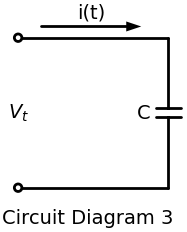

In [26]:
with schemdraw.Drawing() as d:
    elm.Gap().up().label(r'$V_t$')
    l = elm.Line().right().idot(open=True)
    elm.CurrentLabel().label('i(t)').at(l)
    elm.Capacitor().down().label('C')
    elm.Line().left().dot(open=True)
    d.here = (d.here[0] + d.unit/2, d.here[1] - 0.5)
    elm.Label('Circuit Diagram 3')

##### remembering  $ i(t) = C\frac{dv(t)}{dt}$ and with help of T[4] :
##### $$eq[7]: I_S = C(SV_S - v(0^{-}))$$ if $v(0^{-}) \neq 0$ we can think of a capacitor in S-Domain either an impedance in series with a voltage source or an admitance in parallel with current source. Circuit Diagram 4 and 5 show this states:
##### $$eq[8]: V_s = \frac {I_S}{CS} + \frac {v(0^{-})}{S}$$ 

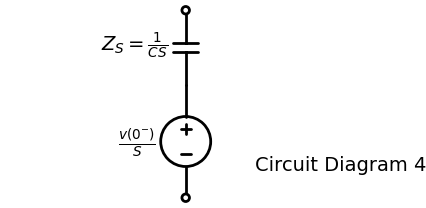

In [3]:
with schemdraw.Drawing() as d:
    elm.Capacitor().down().idot(open=True).label(r'$Z_S = \frac {1}{CS}$').length(d.unit / 2)
    elm.SourceV().dot(open=True).down().length(d.unit * 0.75).label(r'$\frac {v(0^{-})}{S}$').reverse()
    d.here = (3, -d.unit)
    elm.Label('Circuit Diagram 4')

Currenrt source parallel with an impedance: $$ I_S = CSV_S - Cv(0^{-})$$

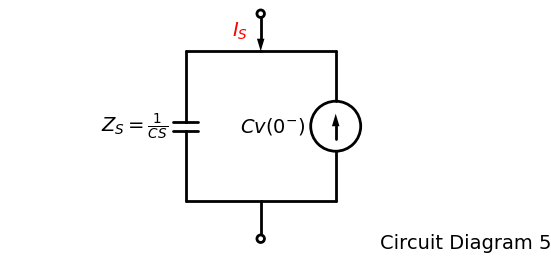

In [54]:
schemdraw.theme('default')
with schemdraw.Drawing() as d:
    L = elm.Line(arrow='->').length(d.unit/4).down().idot(open=True).label(r'$I_S$', color='red')
    d.push()
    elm.Line().right().length(d.unit/2)
    elm.SourceI().label(r'$Cv(0^{-})$').down().reverse()
    elm.Line().left().length(d.unit / 2)
    d.pop()
    elm.Line().left().length(d.unit / 2)
    elm.Capacitor().label(r'$Z_S = \frac {1}{CS}$').down()
    elm.Line().right().length(d.unit/ 2)
    elm.Line().length(d.unit / 4).dot(open=True).down()
    d.here = (d.here[0] + 4, d.here[1])
    elm.Label('Circuit Diagram 5')
    

#### Inductor:


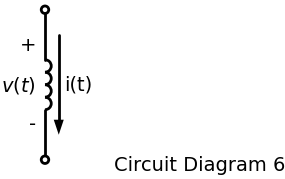

In [60]:
with schemdraw.Drawing() as d:
    I = elm.Inductor().down().idot(open=True).dot(open=True).label(['+',r'$v(t)$','-'])
    elm.CurrentLabel().at(I).label('i(t)')
    d.here = (d.here[0] + 3, d.here[1])
    elm.Label('Circuit Diagram 6')

 $$ v(t) = L\frac{di(t)}{dt}$$ getting laplace of both sides: $$eq[9]: V_S = LSI_S - Li(0^{-})$$  $$ or $$ $$eq[10]: I_S = \frac{V_S}{LS} + \frac{i(0^{-})}{S}$$
As eq[9] and eq[10] suggest, we can model an inductur with initial current $i(0^{-}) \neq 0$ either as an impedance parallel with a current source or an impedance in series with a voltage source. Circuit diagram 7 and 8 show this models.

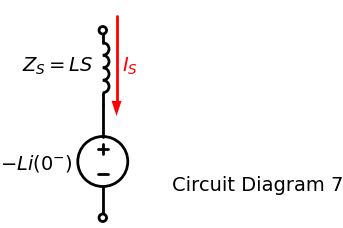

In [38]:
with schemdraw.Drawing() as d:
    I = elm.Inductor().down().idot(open=True).label(r'$Z_S = LS$').length(d.unit / 2)
    elm.CurrentLabel().label(r'$I_S$').at(I).color('red')
    elm.SourceV().dot(open=True).down().length(d.unit * 0.75).label(r'$-Li(0^{-})$').reverse()
    d.here = (3, -d.unit)
    elm.Label('Circuit Diagram 7')

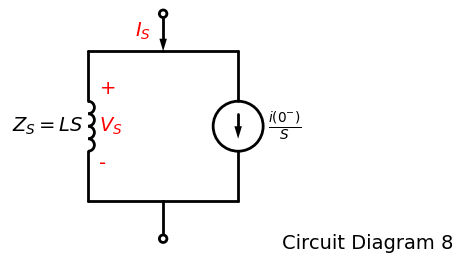

In [19]:
with schemdraw.Drawing() as d:
    L = elm.Line(arrow='->').length(d.unit/4).down().idot(open=True).label(r'$I_S$', color='red')
    d.push()
    elm.Line().right().length(d.unit/2)
    elm.SourceI().label(r'$\frac{i(0^{-})}{S}$', loc='bot').down()
    elm.Line().left().length(d.unit / 2)
    d.pop()
    elm.Line().left().length(d.unit / 2)
    elm.Inductor().label(r'$Z_S = LS$').down().label(['+', r'$V_S$', '-'], loc='bot', color='red')
    elm.Line().right().length(d.unit/ 2)
    elm.Line().length(d.unit / 4).dot(open=True).down()
    d.here = (d.here[0] + 4, d.here[1])
    elm.Label('Circuit Diagram 8')

### Mesh and Nodal Analysis in S-domain

Mesh and Nodal Analysis are critical methodologies in circuit analysis, enabling the systematic determination of currents and voltages in complex electrical networks. When extended to the S-domain via the Laplace transform, these techniques facilitate the handling of dynamic components and initial conditions with greater ease and precision.

In the S-domain, circuit elements are represented by their impedances which I have mentioned in previous section. afer replacing each component with equvalant  representation in S-domain you can apply most of the thechniques you have learnt on analysing a circuit. the most important one are mentioned in bellow: 
- Thevenin Equvalant
- Norton Equvalant
- source tranformation
- equvalant impedance 

#### Mesh Analysis in the S-Domain

Mesh Analysis involves formulating and solving Kirchhoff's Voltage Law (KVL) equations for the loops (meshes) in a circuit. Each mesh equation in the S-domain is derived by summing the voltage drops across all elements in a loop and equating them to zero.

#### General Steps:
1. **Identify Meshes**: Determine the independent loops in the circuit.
2. **Assign Mesh Currents**: Define a current variable for each mesh.
3. **Calculate Impedances**: Replace each component with it's S-domain representation.
4. **Apply KVL**: Write KVL equations for each mesh in the S-domain.
5. **Solve System of Equations**: Solve the resulting linear algebraic equations for the mesh currents.


**Example:** calculate currents $i_1$ and $i_2$ of each mesh in bellow diagram.

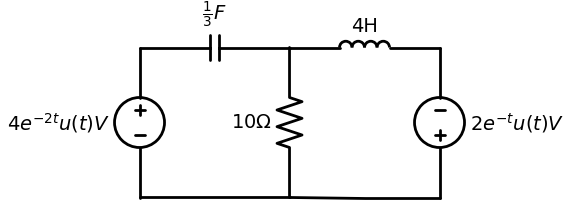

In [7]:
with schemdraw.Drawing() as d:
    elm.SourceV().label(r'$4e^{-2t}u(t) V$')
    elm.Capacitor().right().label(r'$\frac{1}{3}F$')
    d.push()
    elm.Inductor().right().label(r'4H')
    elm.SourceV().label(r'$2e^{-t}u(t) V$', loc='bot').down()
    elm.Line().left()
    elm.Resistor().label(r'$10\Omega$').hold().up()
    elm.Line().left()

**solve:** first we determine the currents, second calculate equvalant circuit in S-domain:

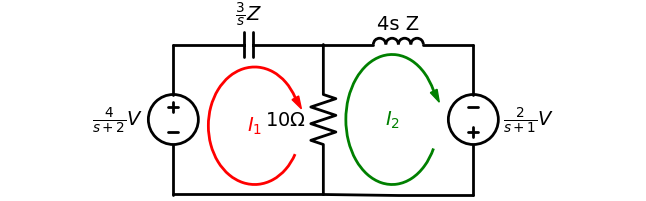

In [8]:
with schemdraw.Drawing() as d:
    V1 = elm.SourceV().label(r'$\frac{4}{s + 2} V$')
    C1 = elm.Capacitor().right().label(r'$\frac{3}{s} Z$')
    I1 = elm.Inductor().right().label(r'4s Z')
    V2 = elm.SourceV().label(r'$\frac{2}{s + 1} V$', loc='bot').down()
    L2 = elm.Line().left()
    R = elm.Resistor().label(r'$10\Omega$').hold().up()
    L1 = elm.Line().left()
    elm.LoopCurrent([C1, R, L1, V1], direction='cw').color('red').label(r'$I_1$')
    elm.LoopCurrent([I1, V2, L2, R], direction='cw').color('green').label(r'$I_2$')

now we apply KVL:

**mesh1:**
$$
\begin{aligned}
    -\frac{4}{s + 2} + \frac{3}{s}I_1 + 10(I_1 - I_2) = 0 \\
    \text{simplfy and we get:} \\
    (10 + \frac{3}{s})I_1 - 10I_2 = \frac{4}{s + 2}
\end{aligned}
$$
**mesh2:**
$$
\begin{aligned}
    -\frac{2}{s + 1} + 10(I_2 - I_1) + 4sI_2 = 0 \\
    \text{simplfy and  we get:} \\
    -10I_1 + (4s + 10)I_2 = \frac{2}{s + 1}
\end{aligned}
$$
now we have two equations  and two variables, after solving we get:
$$
I_1 = \frac{2s(4s^{2} + 19s + 20)}{20s^{4} + 66s^{3} + 73s^{2} + 57s + 30} A
$$
$$
I_2 = \frac{30s^{2} + 43s + 6}{(s + 2)(20s^{3} + 26s^{2} + 21s + 15)}A
$$
now we take inverse Laplace Transform:
$$
\begin{aligned}
i_1(t) = -96.39e^{-2t} - 344.8e^{-t} + 841.2e^{-0.15t} \cos(0.8529t) + 197.7e^{-0.15t} \sin(0.8529t) \, \text{mA} \\
i_2(t) = -481.9e^{-2t} - 241.4e^{-t} + 723.3e^{-0.15t} \cos(0.8529t) + 472.8e^{-0.15t} \sin(0.8529t) \, \text{mA}
\end{aligned}
$$


#### Nodal Analysis in the S-domain
Nodal Analysis involves applying Kirchhoff's Current Law (KCL) to determine the voltages at various nodes in the circuit. Each nodal equation is derived by summing the currents entering and leaving a node and setting the sum to zero.

#### General Steps:
1. **Identify Nodes**: Determine all nodes in the circuit.
2. **Select Reference Node**: Choose a reference (ground) node.
3. **Assign Node Voltages**: Define voltage variables for each node relative to the reference node.
4. **Transform to S-domain**: Relace elemnts with equvalant representation in the S-domain.
5. **Apply KCL**: Write KCL equations for each node in the S-domain.
6. **Solve System of Equations**: Solve the resulting linear algebraic equations for the node voltages.

**Example**: find $v_1, v_2, v_3$ in the circuit represented bellow.


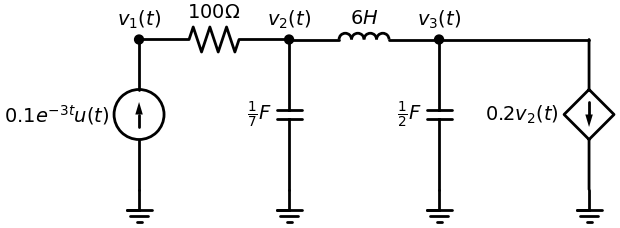

In [17]:
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourceI().label(r'$0.1e^{-3t}u(t)$')
    elm.Dot().label(r'$v_1(t)$')
    elm.Resistor().right().label(r'$100\Omega$')
    elm.Dot().label(r'$v_2(t)$')
    d.push()
    elm.Capacitor().down().label(r'$\frac{1}{7}F$')
    elm.Ground()
    d.pop()
    elm.Inductor().right().label(r'$6H$')
    elm.Dot().label(r'$v_3(t)$')
    d.push()
    elm.Capacitor().down().label(r'$\frac{1}{2}F$')
    elm.Ground()
    d.pop()
    elm.Line().right()
    elm.SourceControlledI().label(r'$0.2v_2(t)$').down()
    elm.Ground()
    

**solve**: steps 1 to 3, are  already done. first we transform our citcuit into equvalant one in S-domain.

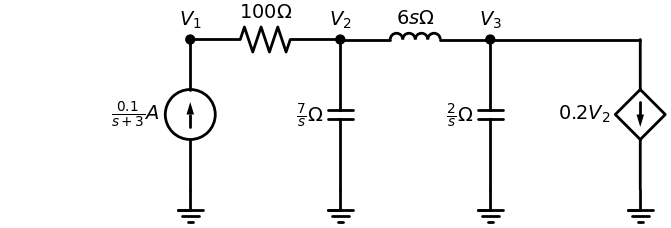

In [16]:
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourceI().label(r'$\frac{0.1}{s + 3} A$')
    elm.Dot().label(r'$V_1$')
    elm.Resistor().right().label(r'$100 \Omega$')
    elm.Dot().label(r'$V_2$')
    d.push()
    elm.Capacitor().down().label(r'$\frac{7}{s} \Omega$')
    elm.Ground()
    d.pop()
    elm.Inductor().right().label(r'$6s \Omega$')
    elm.Dot().label(r'$V_3$')
    d.push()
    elm.Capacitor().down().label(r'$\frac{2}{s} \Omega$')
    elm.Ground()
    d.pop()
    elm.Line().right()
    elm.SourceControlledI().label(r'$0.2V_2$').down()
    elm.Ground()

**Node1**
$$
\begin{aligned}
\frac{0.1}{s + 3} = \frac{V_1 - V_2}{100}\\
\text{or: }\quad\frac{10}{s + 3 } = V_1 - V_2
\end{aligned}
$$
**Node2**
$$
\begin{aligned}
0 = \frac{V_2 - V_1}{100} + \frac{sV_2}{7} + \frac{V_3 - V_2}{6s}
\end{aligned}
$$
**Node3**
$$
\begin{aligned}
    -0.2 = \frac{sV_3}{2} + \frac{V_3 - V_2}{6s}
\end{aligned}
$$
now solving for $V_1, V_2, V_3$ we get:

$$
\begin{aligned}
V_1 = 3 \frac{100s^3 + 7s^2 + 150s + 49}{(s + 3)(30s^3 + 45s + 14)} \\
V_2 = 7 \frac{3s^2 + 1}{(s + 3)(30s^3 + 45s + 14)} \\
V_3 = -1.4 \frac{6s - 5}{(s + 3)(30s^3 + 45s + 14)}
\end{aligned}
$$
The only remaining step is to take the inverse Laplace transform of
each voltage, so that, for t > 0,
$$
\begin{align*}
v_1(t) &= 9.789e^{-3t} + 0.06173e^{-0.2941t} + 0.1488e^{0.1471t} \cos(1.251t) \\
       &\quad + 0.05172e^{0.1471t} \sin(1.251t) \quad \text{V} \\
v_2(t) &= -0.2105e^{-3t} + 0.06173e^{-0.2941t} + 0.1488e^{0.1471t} \cos(1.251t) \\
       &\quad + 0.05172e^{0.1471t} \sin(1.251t) \quad \text{V} \\
v_3(t) &= -0.03459e^{-3t} + 0.06631e^{-0.2941t} - 0.03172e^{0.1471t} \cos(1.251t) \\
       &\quad - 0.06362e^{0.1471t} \sin(1.251t) \quad \text{V}
\end{align*}
$$

### Natural Response in S-domain


### Convolution
The s-domain techniques we have developed up to this point are very use-
ful in determining the current and voltage response of a particular circuit.
However, in practice we are often faced with circuits to which arbitrary
sources can be connected, and require an efficient means of determining the
new output each time. This is easily accomplished if we can characterize the
basic circuit by a transfer function called the **system function**.
The analysis can proceed in either the time domain or the frequency do-
main, although it is generally more useful to work in the frequency domain.
In such situations, we have a simple four-step process:

1. Determine the circuit system function (if not already known);
2. Obtain the Laplace transform of the forcing function to be applied;
3. Multiply this transform and the system function;
4. and finally Perform an inverse transform operation on the product to find the
output.

#### The Impulse Response
Consider a linear electrical network N, without initial stored energy, to which
a forcing function x(t) is applied. At some point in this circuit, a response
function y(t) is present. We show this in block diagram form in Fig. 15.20a
along with sketches of generic time functions. The forcing function is shown
to exist only in the interval a < t < b. Thus, y(t) exists only for t > a.
The question that we now wish to answer is this: “If we know the form
of x(t), how is y(t) described?” To answer this question, we need to know
something about N, such as its response when the forcing function is a unit
impulse $\delta(t)$. That is, we are assuming that we know h(t), the response
function resulting when a unit impulse is supplied as the forcing function at
t = 0, as shown in Fig. 15.20b. The function h(t) is commonly called the
unit-impulse response function, or the **impulse response**.

before start explaining I must mention an important equation:
$$
\mathcal{L}\{\delta(t)\} = 0
$$
**proof**:
Since the impulse is 0 everywhere but t=0, we can change the upper limit of the integral to 0+. Since e-st is continuous at t=0, that is the same as saying it is constant from t=0- to t=0+. So we can replace e-st by its value evaluated at t=0. So the Laplace Transform of the unit impulse is just one.

If $x(t)= \delta(t)$, then according to above equation, $X(s)= 1$. Thus, $H(s)= Y(s)$
and so in this instance $h(t)= y(t)$.

Instead of applying the unit impulse at time t = 0, let us now suppose
that it is applied at time t = $\lambda$ (lambda). We see that the only change in the
output is a time delay. Thus, the output becomes $h(t− \lambda)$ when the input
is δ(t− λ), as shown in Fig. Next, suppose that the input impulse
has some strength other than unity. Specifically, let the strength of the im-
pulse be numerically equal to the value of x(t) when $t = \lambda$. This value x(λ)
is a constant; we know that the multiplication of a single forcing function in
a linear circuit by a constant simply causes the response to change propor-
tionately. Thus, if the input is changed to x(λ)δ(t− λ), then the response
becomes x(λ)h(t− λ).

Now let us sum this latest input over all possible values of λ and use the
result as a forcing function for N. Linearity decrees that the output must be
equal to the sum of the responses resulting from the use of all possible val-
ues of λ. Loosely speaking, the integral of the input produces the integral of
the output, as shown in Fig. But what is the input now? Given the
sifting property1 of the unit impulse, we see that the input is simply x(t), the
original input.

what told above is just an explanation for bellow equation:
$$
\begin{aligned}
\mathcal{y(\lambda)} = \int_{\infty}^{\infty}\mathcal{x(t)h(t - \lambda)dt}
\end{aligned}
$$

where h(t) is the impulse response of N. This important relationship is
known far and wide as the **convolution integral**. In words, this last equation
states that the output is equal to the input convolved with the impulse
response. It is often abbreviated by means of
$$
\mathcal{y(t)} = \mathcal{x(t) * h(t)}
$$

**important equation**:
$$
\begin{align*}
y(t) &= x(t) * h(t) = \int_{-\infty}^{\infty} x(z) h(t - z) \, dz \\
     &= \int_{-\infty}^{\infty} x(t - z) h(z) \, dz
\end{align*}
$$
**proof:** let z = t− λ, then dλ=−dz, and the expression for y(t)
becomes

$$
\begin{align*}
y(t) &= \int_{\infty}^{-\infty} -x(t - z) h(z) \, dz = \int_{-\infty}^{\infty} x(t - z) h(z) \, dz
\end{align*}
$$

#### Convolution and Realizable Systems
The result that we have in above is very general; it applies to any linear
system. However, we are usually interested in physically realizable
systems, those that do exist or could exist, and such systems have a property
that modifies the convolution integral slightly. That is, the response of the
system cannot begin before the forcing function is applied. In particular,
h(t) is the response of the system resulting from the application of a unit
impulse at t = 0. Therefore, h(t) cannot exist for t < 0. It follows that, in
the second integral of above, the integrand is zero when z < 0; in the first
integral, the integrand is zero when (t− z) is negative, or when z > t.
Therefore, for realizable systems the limits of integration change in the
convolution integrals:
$$
\begin{align*}
y(t) &= x(t) * h(t) = \int_{-\infty}^{t} x(z) h(t - z) \, dz \\
     &= \int_{0}^{\infty} x(t - z) h(z) \, dz
\end{align*}
$$

### Convolution and Laplace Transform

Convolution has applications in a wide variety of disciplines beyond linear
circuit analysis, including image processing, communications, and semi-
conductor transport theory. It is often helpful therefore to have a graphical
intuition of the basic process, even if the integral expressions of convulotion are not always the best solution route. 
One powerful alternative approach makes use of properties of the Laplace transform—hence our in-
troduction to convolution in this chapter.

## Part4

In this part I will present a brief introduction to passive filters, which as the name suggests are filters which do not
amplify the input signal. In these kind of circuits gain is usually less than 1.

Passive RC filters “filter-out” unwanted signals as they separate and allow to pass only those sinusoidal input signals based upon their frequency with the most simple being passive low pass filter network.

In low frequency applications (up to 100kHz), passive filters are generally constructed using simple RC (Resistor-Capacitor) networks, while higher frequency filters (above 100kHz) are usually made from RLC (Resistor-Inductor-Capacitor) components.

Passive filters are made up of passive components such as resistors, capacitors and inductors and have no amplifying elements (transistors, op-amps, etc) so have no signal gain, therefore their output level is always less than the input

### Low Pass Filter
     the low pass filter only allows low frequency signals from 0Hz to its cut-off frequency, ƒc point to pass while blocking those any higher.
A simple passive RC Low Pass Filter or LPF, can be easily made by connecting together in series a single Resistor with a single Capacitor as shown below. In this type of filter arrangement the input signal ( VIN ) is applied to the series combination (both the Resistor and Capacitor together) but the output signal ( VOUT ) is taken across the capacitor only.

This type of filter is known generally as a “first-order filter” or “one-pole filter”, why first-order or single-pole?, because it has only “one” reactive component, the capacitor, in the circuit.

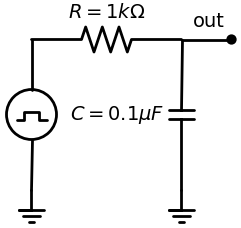

In [18]:
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourcePulse().up()
    elm.Resistor().right().label(r'$R = 1k\Omega$')
    elm.Line().length(d.unit / 3).right().dot().label('out').hold()
    elm.Capacitor().down().label(r'$C = 0.1\mu F$')
    elm.Ground()

behaviour of above circuit is better understanded when analyzed and presented on a plot. 

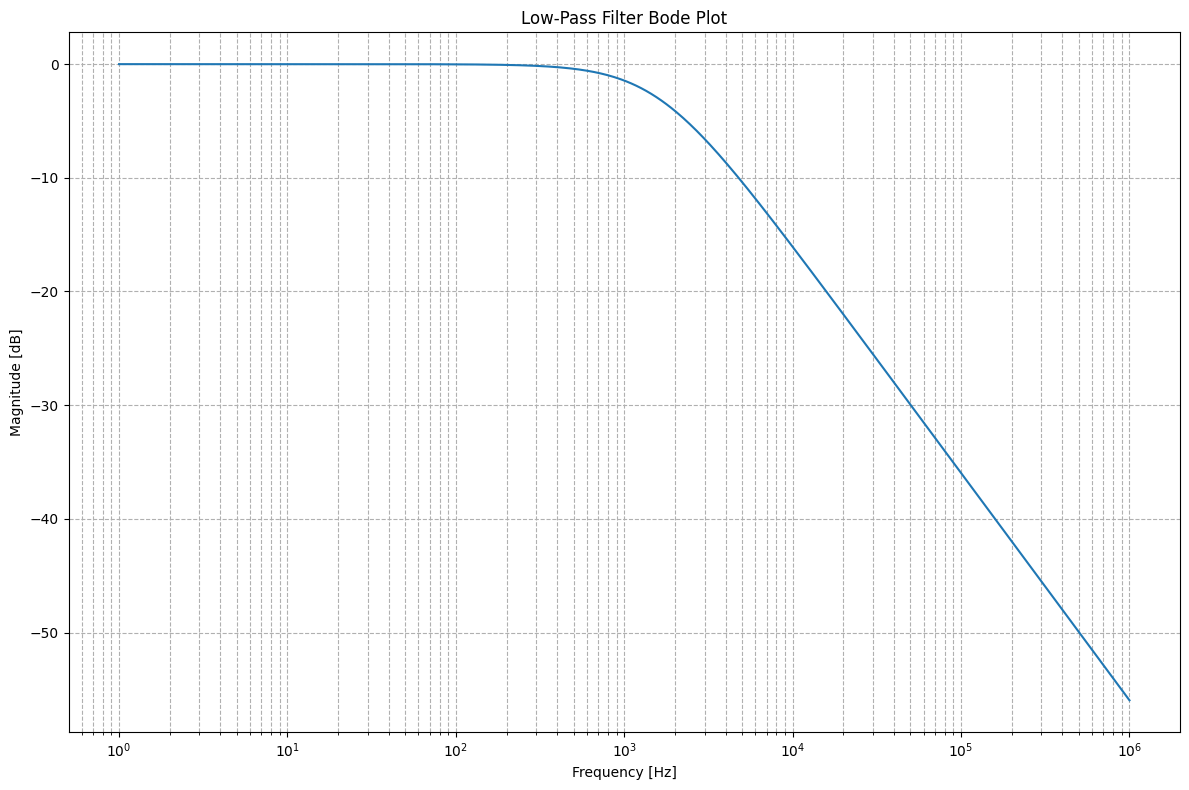

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot

# Define the circuit
circuit = Circuit('Low-Pass Filter')

# Add components
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=1@u_V, frequency=1@u_kHz)
circuit.R(1, 'input', 'output', 1@u_kOhm)
circuit.C(1, 'output', circuit.gnd, 0.1@u_uF)

# Perform AC analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=1@u_MHz, number_of_points=100, variation='dec')

# Plot the results
figure, axe = plt.subplots(figsize=(12, 8))

# Bode plot (magnitude)
axe.semilogx(np.array(analysis.frequency), 20 * np.log10(np.abs(analysis['output']) / np.abs(analysis['input'])))
axe.set_title('Low-Pass Filter Bode Plot')
axe.set_xlabel('Frequency [Hz]')
axe.set_ylabel('Magnitude [dB]')
axe.grid(True, which='both', linestyle='--')

plt.tight_layout()
plt.show()


By previous discussion you are now capable of analysing above circuit in Phasor or S-domain, here we can achive the 
magnitude of out put with the help of bellow relations:
$$
\begin{align}
    Z_{total} = \sqrt{R^{2} + X_c^{2}} \\
    v_{out} = v_{in} * \frac{x_c}{Z_{total}}
\end{align}
$$
here $x_c$ is the impedance of the capacitor, knowing from previous parts, we get:
$$
    x_c = \frac{1}{SC}
$$
by increasing S, which is our frequency, impedance of the capacitor tends to infinity and acts as a Open Circuit. As can be  seen from above 
plot in the low frequrncies the output is approxiamatly equal to the input cuase the gain is 1.
on the other side by lowering the S, the impedance tends to zero and capacitor acts as a Short Circuit, the voltage across the capacitor tends to zero.


**Cut-off Frequency:**
This “Cut-off”, “Corner” or “Breakpoint” frequency is defined as being the frequency point where the capacitive reactance and resistance are equal, R = Xc = 1KΩ. When this occurs the output signal is attenuated to 70.7% of the input signal value or -3dB (20 log (Vout/Vin)) of the input. Although R = Xc, the output is not half of the input signal. This is because it is equal to the vector sum of the two and is therefore 0.707 of the input.
$$
    s = \frac{1}{RC}
$$
and if the input is only sinusoidal:
$$
    f_c = \frac{1}{2\pi RC}
$$

#### The integrator RC circuit

The Integrator is basically a low pass filter circuit operating in the time domain that converts a square wave “step” response input signal into a triangular shaped waveform output as the capacitor charges and discharges. A Triangular waveform consists of alternate but equal, positive and negative ramps.
As seen below, if the RC time constant is long compared to the time period of the input waveform the resultant output waveform will be triangular in shape and the higher the input frequency the lower will be the output amplitude compared to that of the input.
This then makes this type of circuit ideal for converting one type of electronic signal to another for use in wave-generating or wave-shaping circuits.

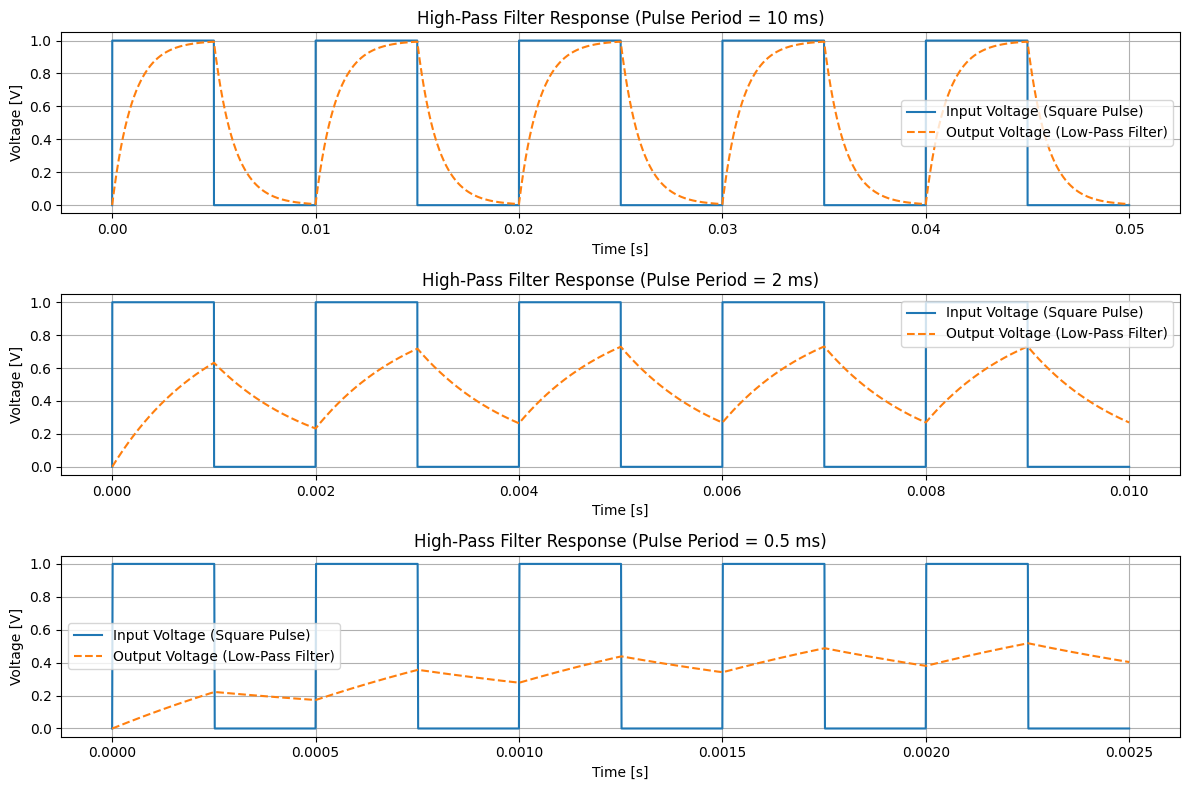

In [29]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot

# Function to simulate and return analysis for a given pulse frequency
def simulate_high_pass(pulse_period):
    circuit = Circuit(f'High-Pass RC Filter with Pulse Period = {pulse_period} s')
    circuit.PulseVoltageSource(1, 'input', circuit.gnd,
                               initial_value=0@u_V,
                               pulsed_value=1@u_V,
                               pulse_width=pulse_period / 2,
                               period=pulse_period)
    circuit.R(1, 'input', 'output', 1@u_kΩ)
    circuit.C(1, 'output', circuit.gnd, 1@u_uF)
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=1@u_us, end_time=5 * pulse_period)
    return analysis

# Define pulse periods (frequencies: low, medium, high)
pulse_periods = [10@u_ms, 2@u_ms, 0.5@u_ms]

# Plot results
plt.figure(figsize=(12, 8))

for i, pulse_period in enumerate(pulse_periods, start=1):
    analysis = simulate_high_pass(pulse_period)
    plt.subplot(3, 1, i)
    plt.plot(analysis.time, analysis['input'], label='Input Voltage (Square Pulse)')
    plt.plot(analysis.time, analysis['output'], label='Output Voltage (Low-Pass Filter)', linestyle='dashed')
    plt.title(f'High-Pass Filter Response (Pulse Period = {pulse_period})')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


### High Pass Filter

Where as the low pass filter only allowed signals to pass below its cut-off frequency point, ƒc,
the passive high pass filter circuit as its name implies, only passes signals above the selected cut-off point, ƒc eliminating any low frequency signals from the waveform. Consider the circuit below.

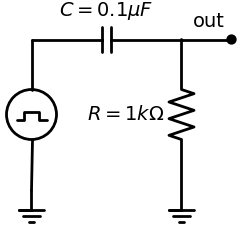

In [20]:
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourcePulse().up()
    elm.Capacitor().right().label(r'$C = 0.1\mu F$')
    elm.Line().length(d.unit / 3).right().dot().label('out').hold()
    elm.Resistor().down().label(r'$R = 1k\Omega$')
    elm.Ground()

In this circuit arrangement,
the reactance of the capacitor is very high at low frequencies so the capacitor acts like an open circuit and blocks any input signals at VIN until the cut-off frequency point ( ƒC ) is reached. Above this cut-off frequency point the reactance of the capacitor has reduced sufficiently as to now act more like a short circuit allowing all of the input signal to pass directly to the output as shown below in the filters response curve.

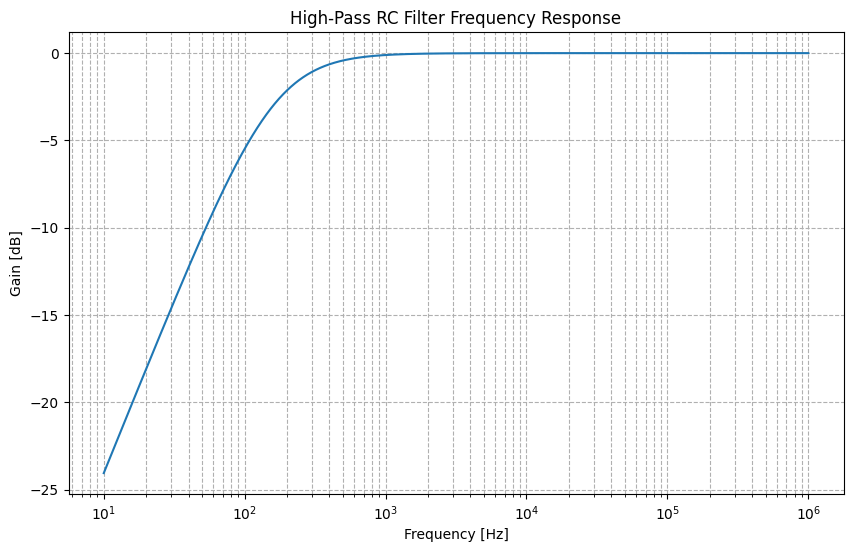

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Probe.Plot import plot
from PySpice.Unit import *

# Define the circuit
circuit = Circuit('High-Pass RC Filter')
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=1@u_V, frequency=1@u_kHz)
circuit.C(1, 'input', 'output', 1@u_uF)
circuit.R(1, 'output', circuit.gnd, 1@u_kOhm)

# Perform AC analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
frequency = np.logspace(1, 6, num=500)  # Frequencies from 10 Hz to 1 MHz
analysis = simulator.ac(start_frequency=10@u_Hz, stop_frequency=1@u_MHz, number_of_points=500, variation='dec')

# Calculate the gain in decibels
gain = 20 * np.log10(np.absolute(analysis['output'] / analysis['input']))

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(analysis.frequency, gain)
plt.title('High-Pass RC Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid(True, which="both", ls="--")
plt.show()


The Bode Plot or Frequency Response Curve above for a passive high pass filter
is the exact opposite to that of a low pass filter. Here the signal is attenuated or damped at low frequencies with the output increasing at +20dB/Decade (6dB/Octave) until the frequency reaches the cut-off point ( ƒc ) where again R = Xc. It has a response curve that extends down from infinity to the cut-off frequency, where the output voltage amplitude is 1/√2  = 70.7% of the input signal value or -3dB (20 log (Vout/Vin)) of the input value.

$$
    s_c = \frac{1}{RC}
$$
And if the input is only sinusoidal:
$$
    f_c = \frac{1}{2\pi RC}
$$

#### The RC Differentiator

Up until now the input waveform to the filter has been assumed to be sinusoidal or that of a sine wave consisting of a fundamental signal and some harmonics operating in the frequency domain giving us a frequency domain response for the filter. However, if we feed the High Pass Filter with a Square Wave signal operating in the time domain giving an impulse or step response input, the output waveform will consist of short duration pulse or spikes as shown

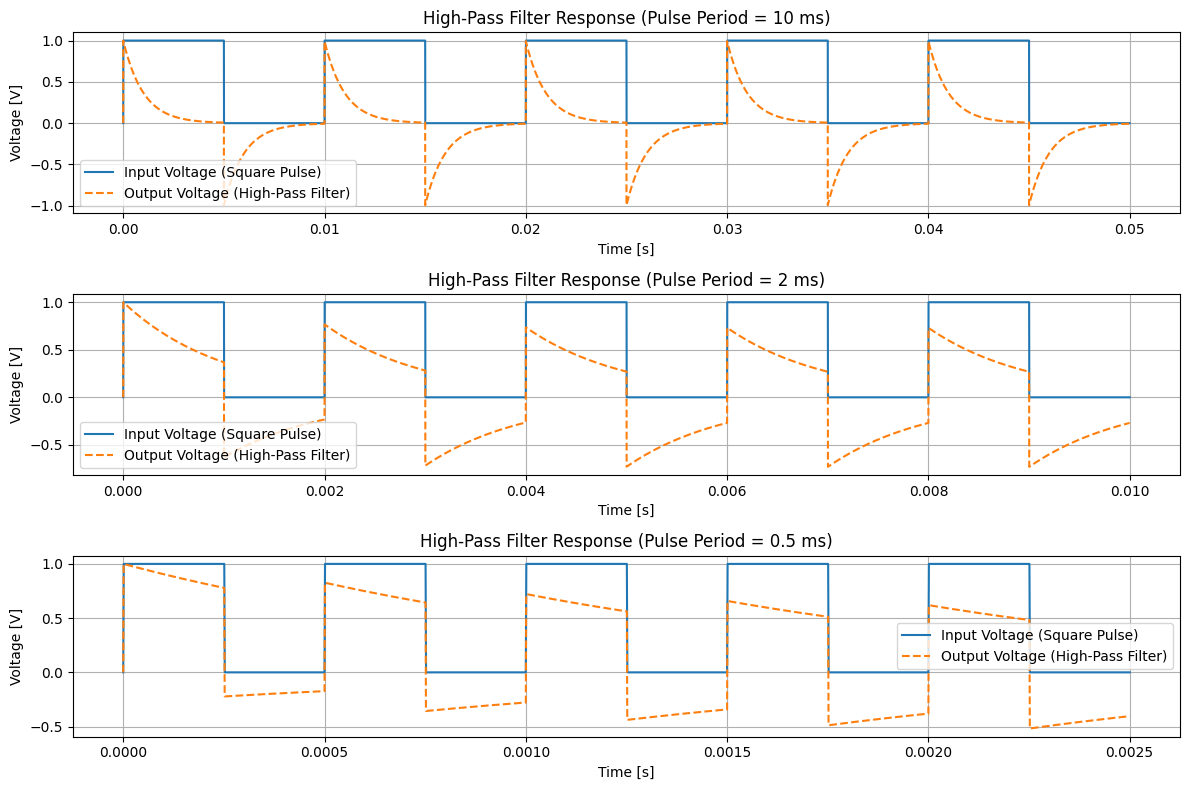

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot

# Function to simulate and return analysis for a given pulse frequency
def simulate_high_pass(pulse_period):
    circuit = Circuit(f'High-Pass RC Filter with Pulse Period = {pulse_period} s')
    circuit.PulseVoltageSource(1, 'input', circuit.gnd,
                               initial_value=0@u_V,
                               pulsed_value=1@u_V,
                               pulse_width=pulse_period / 2,
                               period=pulse_period)
    circuit.C(1, 'input', 'output', 1@u_uF)
    circuit.R(1, 'output', circuit.gnd, 1@u_kOhm)
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=1@u_us, end_time=5 * pulse_period)
    return analysis

# Define pulse periods (frequencies: low, medium, high)
pulse_periods = [10@u_ms, 2@u_ms, 0.5@u_ms]

# Plot results
plt.figure(figsize=(12, 8))

for i, pulse_period in enumerate(pulse_periods, start=1):
    analysis = simulate_high_pass(pulse_period)
    plt.subplot(3, 1, i)
    plt.plot(analysis.time, analysis['input'], label='Input Voltage (Square Pulse)')
    plt.plot(analysis.time, analysis['output'], label='Output Voltage (High-Pass Filter)', linestyle='dashed')
    plt.title(f'High-Pass Filter Response (Pulse Period = {pulse_period})')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Each cycle of the square wave input waveform produces two spikes at the output, one positive and one negative and whose amplitude is equal to that of the input. The rate of decay of the spikes depends upon the time constant, ( RC ) value of both components, ( t = R x C ) and the value of the input frequency. The output pulses resemble more and more the shape of the input signal as the frequency increases.

### Band Pass Filter

The Passive Band Pass Filter can be used to isolate or filter out certain frequencies that lie within a particular band or range of frequencies. The cut-off frequency or ƒc point in a simple RC passive filter can be accurately controlled using just a single resistor in series with a non-polarized capacitor, and depending upon which way around they are connected, we have seen that either a Low Pass or a High Pass filter is obtained.

One simple use for these types of passive filters is in audio amplifier applications or circuits such as in loudspeaker crossover filters or pre-amplifier tone controls. Sometimes it is necessary to only pass a certain range of frequencies that do not begin at 0Hz, (DC) or end at some upper high frequency point but are within a certain range or band of frequencies, either narrow or wide.

By connecting or “cascading” together a single Low Pass Filter circuit with a High Pass Filter circuit, we can produce another type of passive RC filter that passes a selected range or “band” of frequencies that can be either narrow or wide while attenuating all those outside of this range.

This new type of passive filter arrangement produces a frequency selective filter known commonly as a **Band Pass Filter** or **BPF** for short.

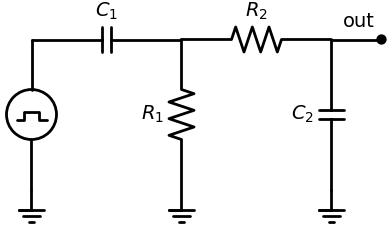

In [6]:
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourcePulse().up()
    elm.Capacitor().right().label(r'$C_1$')
    d.push()
    elm.Resistor().down().label(r'$R_1$')
    elm.Ground()
    d.pop()
    elm.Resistor().right().label(r'$R_2$')
    elm.Line().length(d.unit / 3).right().dot().label('out').hold()
    elm.Capacitor().down().label(r'$C_2$')
    elm.Ground()

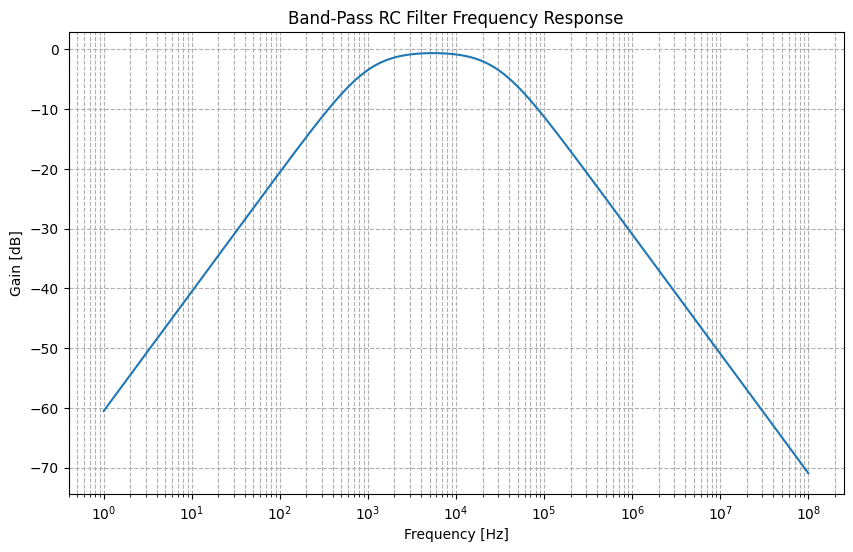

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Probe.Plot import plot
from PySpice.Unit import *

# Define the circuit
circuit = Circuit('High-Pass RC Filter')
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=1@u_V, frequency=1@u_kHz)
circuit.C(1, 'input', 'output1', 15@u_nF)
circuit.R(1, 'output1', circuit.gnd, 10@u_kOhm)
circuit.R(2, 'output1', 'output', 10@u_kOhm)
circuit.C(2, 'output', circuit.gnd, 560@u_pF)
# Perform AC analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
frequency = np.logspace(1, 6, num=500)  # Frequencies from 10 Hz to 1 MHz
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=100@u_MHz, number_of_points=500, variation='dec')

# Calculate the gain in decibels
gain = 20 * np.log10(np.absolute(analysis['output'] / analysis['input']))

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(analysis.frequency, gain)
plt.title('Band-Pass RC Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid(True, which="both", ls="--")
plt.show()

$$
    C_1 = \frac{1}{2\pi R_1F_L}
$$
which $F_L$ is the frequincy which frequincies bellow it are cut.

$$
    C_2 = \frac{1}{2\pi R_2F_R}
$$
which $F_R$ is the frequincy which frequincies above it are cut.

### More example of Passive Filters

now having a general idea of passive filtering, we can devise another circuits which acts as a desired filter. An
interesting example of such situations is an series RLC circuit. By taking the output from capacitor we have an low pass filter, Getting the output from inductor we have a high pass filter and getting the output from resistor makes a band pass filter.

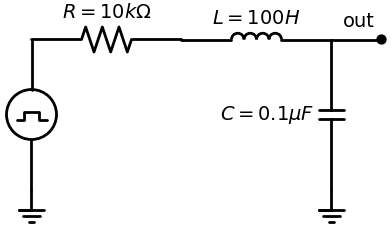

In [17]:
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourcePulse().up()
    elm.Resistor().right().label(r'$R = 10k\Omega$')
    elm.Inductor().right().label(r'$L = 100H$')
    elm.Line().length(d.unit / 3).right().dot().label('out').hold()
    elm.Capacitor().down().label(r'$C = 0.1\mu F$')
    elm.Ground()

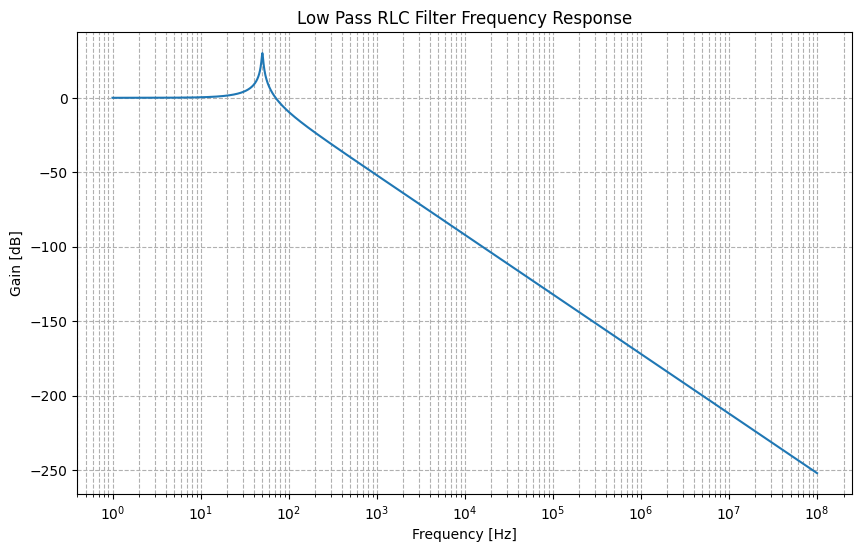

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Probe.Plot import plot
from PySpice.Unit import *

# Define the circuit
circuit = Circuit('High-Pass RC Filter')
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=1@u_V, frequency=1@u_kHz)
circuit.R(1, 'input', 'r', 1@u_kOhm)
circuit.L(1, 'r', 'output', 100@u_H)
circuit.C(1, 'output', circuit.gnd, 0.1@u_uF)
# Perform AC analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
frequency = np.logspace(1, 6, num=500)  # Frequencies from 10 Hz to 1 MHz
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=100@u_MHz, number_of_points=500, variation='dec')

# Calculate the gain in decibels
gain = 20 * np.log10(np.absolute(analysis['output'] / analysis['input']))

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(analysis.frequency, gain)
plt.title('Low Pass RLC Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid(True, which="both", ls="--")
plt.show()

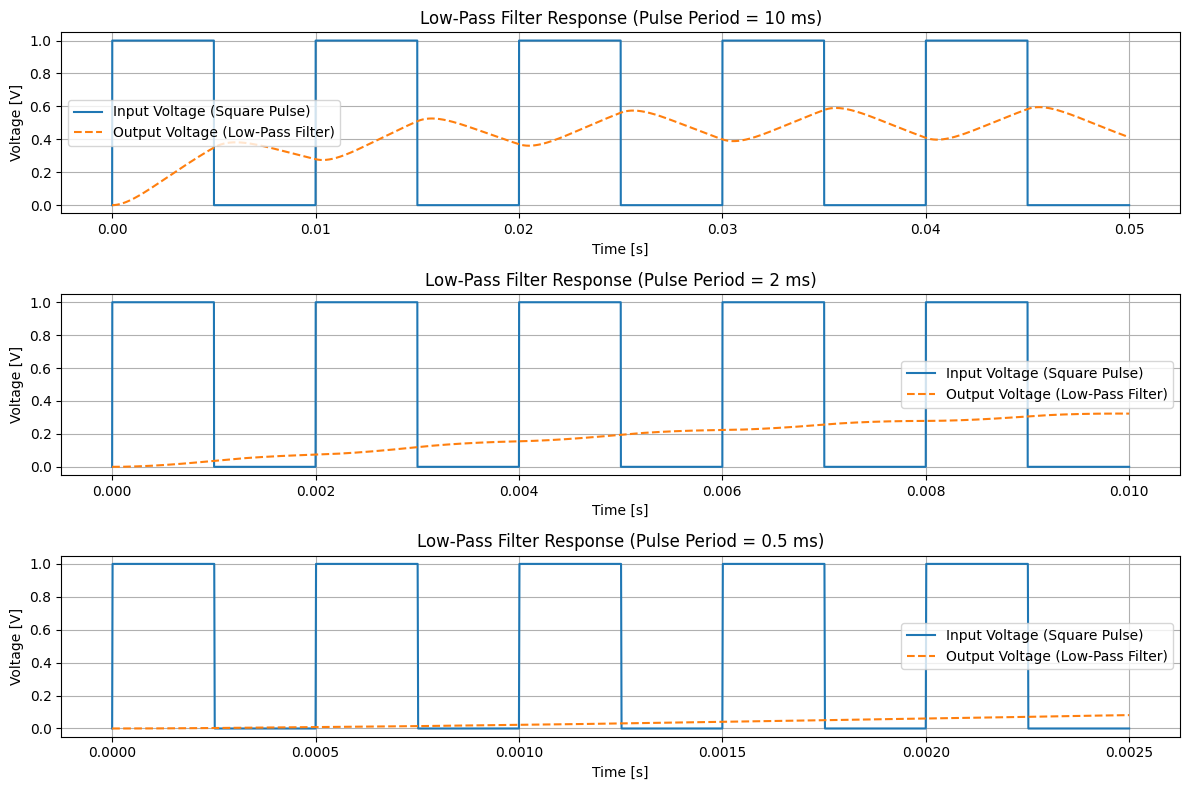

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot

# Function to simulate and return analysis for a given pulse frequency
def simulate_high_pass(pulse_period):
    circuit = Circuit(f'High-Pass RLC Filter with Pulse Period = {pulse_period} s')
    circuit.PulseVoltageSource(1, 'input', circuit.gnd,
                               initial_value=0@u_V,
                               pulsed_value=1@u_V,
                               pulse_width=pulse_period / 2,
                               period=pulse_period)
    circuit.C(1, 'output', circuit.gnd, 1@u_uF)
    circuit.R(1, 'input', 'ri', 10@u_kOhm)
    circuit.L(1, 'ri', 'output', 10@u_H)
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=1@u_us, end_time=5 * pulse_period)
    return analysis

# Define pulse periods (frequencies: low, medium, high)
pulse_periods = [10@u_ms, 2@u_ms, 0.5@u_ms]

# Plot results
plt.figure(figsize=(12, 8))

for i, pulse_period in enumerate(pulse_periods, start=1):
    analysis = simulate_high_pass(pulse_period)
    plt.subplot(3, 1, i)
    plt.plot(analysis.time, analysis['input'], label='Input Voltage (Square Pulse)')
    plt.plot(analysis.time, analysis['output'], label='Output Voltage (Low-Pass Filter)', linestyle='dashed')
    plt.title(f'Low-Pass Filter Response (Pulse Period = {pulse_period})')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

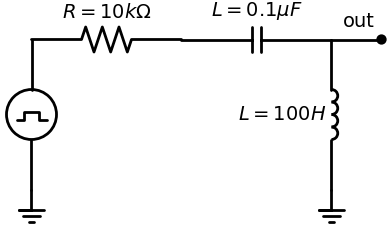

In [23]:
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourcePulse().up()
    elm.Resistor().right().label(r'$R = 10k\Omega$')
    elm.Capacitor().right().label(r'$L = 0.1\mu F$')
    elm.Line().length(d.unit / 3).right().dot().label('out').hold()
    elm.Inductor().down().label(r'$L = 100H$')
    elm.Ground()

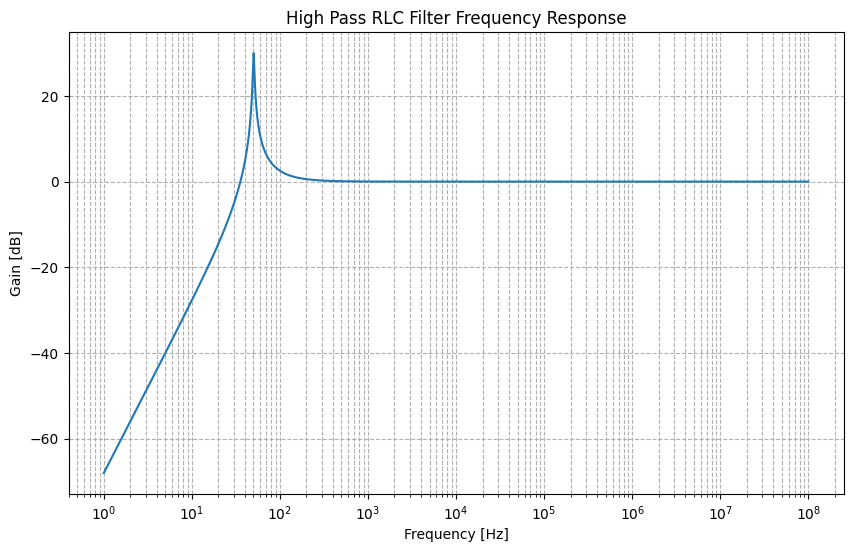

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Probe.Plot import plot
from PySpice.Unit import *

# Define the circuit
circuit = Circuit('High-Pass RC Filter')
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=1@u_V, frequency=1@u_kHz)
circuit.R(1, 'input', 'r', 1@u_kOhm)
circuit.C(1, 'r', 'output', 0.1@u_uF)
circuit.L(1, 'output', circuit.gnd, 100@u_H)
# Perform AC analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
frequency = np.logspace(1, 6, num=500)  # Frequencies from 10 Hz to 1 MHz
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=100@u_MHz, number_of_points=500, variation='dec')

# Calculate the gain in decibels
gain = 20 * np.log10(np.absolute(analysis['output'] / analysis['input']))

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(analysis.frequency, gain)
plt.title('High Pass RLC Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid(True, which="both", ls="--")
plt.show()

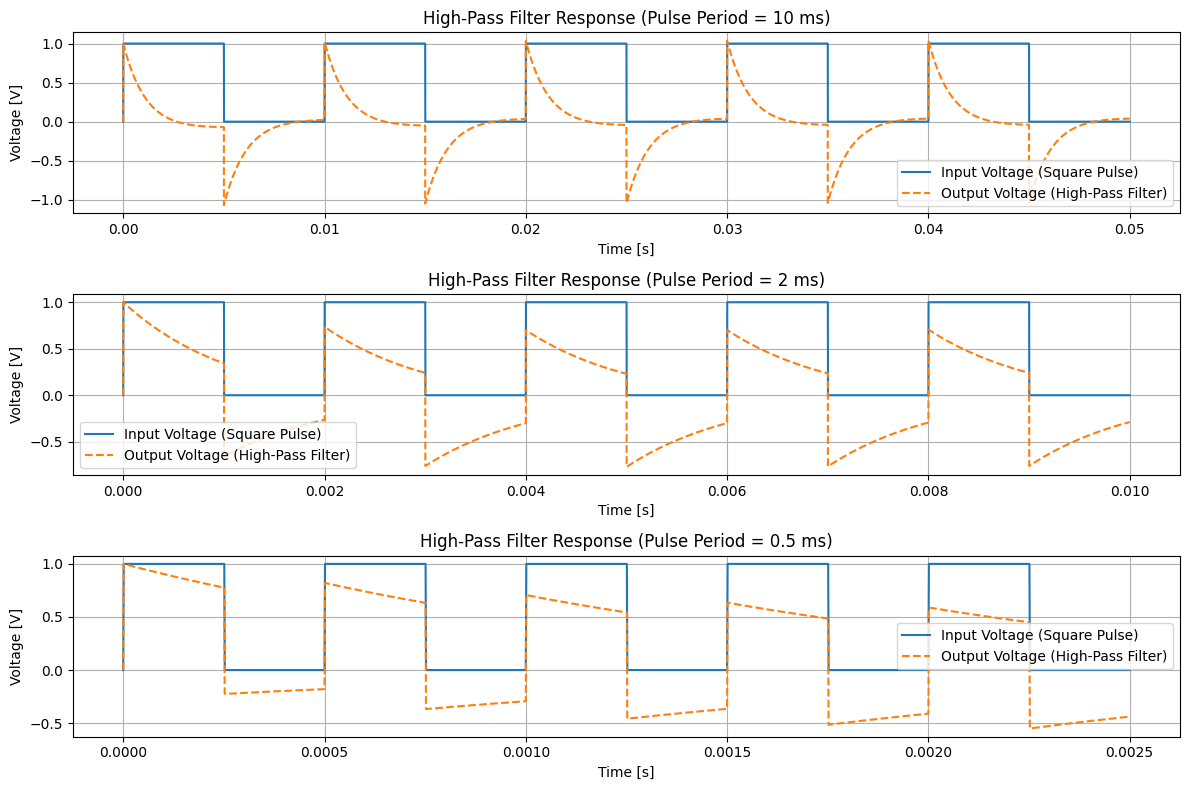

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot

# Function to simulate and return analysis for a given pulse frequency
def simulate_high_pass(pulse_period):
    circuit = Circuit(f'High-Pass RLC Filter with Pulse Period = {pulse_period} s')
    circuit.PulseVoltageSource(1, 'input', circuit.gnd,
                               initial_value=0@u_V,
                               pulsed_value=1@u_V,
                               pulse_width=pulse_period / 2,
                               period=pulse_period)
    circuit.C(1, 'input', 'cr', 1@u_uF)
    circuit.R(1, 'cr', 'output', 10@u_kOhm)
    circuit.L(1, 'output', circuit.gnd, 10@u_H)
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=1@u_us, end_time=5 * pulse_period)
    return analysis

# Define pulse periods (frequencies: low, medium, high)
pulse_periods = [10@u_ms, 2@u_ms, 0.5@u_ms]

# Plot results
plt.figure(figsize=(12, 8))

for i, pulse_period in enumerate(pulse_periods, start=1):
    analysis = simulate_high_pass(pulse_period)
    plt.subplot(3, 1, i)
    plt.plot(analysis.time, analysis['input'], label='Input Voltage (Square Pulse)')
    plt.plot(analysis.time, analysis['output'], label='Output Voltage (High-Pass Filter)', linestyle='dashed')
    plt.title(f'High-Pass Filter Response (Pulse Period = {pulse_period})')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

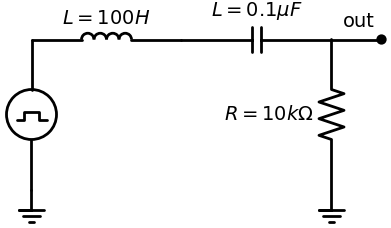

In [27]:
with schemdraw.Drawing() as d:
    elm.Ground()
    elm.SourcePulse().up()
    elm.Inductor().right().label(r'$L = 100 H$')
    elm.Capacitor().right().label(r'$L = 0.1\mu F$')
    elm.Line().length(d.unit / 3).right().dot().label('out').hold()
    elm.Resistor().down().label(r'$R = 10k\Omega$')
    elm.Ground()

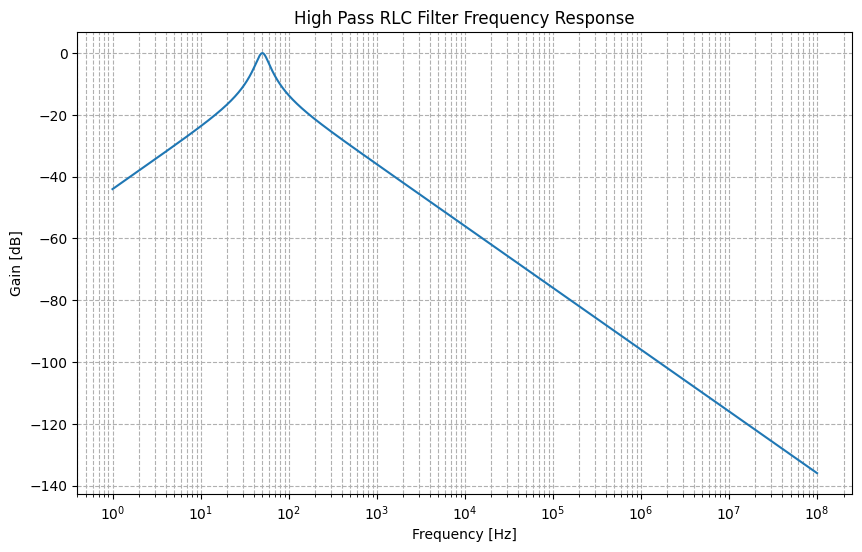

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Probe.Plot import plot
from PySpice.Unit import *

# Define the circuit
circuit = Circuit('High-Pass RC Filter')
circuit.SinusoidalVoltageSource(1, 'input', circuit.gnd, amplitude=1@u_V, frequency=1@u_kHz)
circuit.L(1, 'input', 'r', 100@u_H)
circuit.C(1, 'r', 'output', 0.1@u_uF)
circuit.R(1, 'output', circuit.gnd, 10@u_kOhm)
# Perform AC analysis
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
frequency = np.logspace(1, 6, num=500)  # Frequencies from 10 Hz to 1 MHz
analysis = simulator.ac(start_frequency=1@u_Hz, stop_frequency=100@u_MHz, number_of_points=500, variation='dec')

# Calculate the gain in decibels
gain = 20 * np.log10(np.absolute(analysis['output'] / analysis['input']))

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(analysis.frequency, gain)
plt.title('High Pass RLC Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain [dB]')
plt.grid(True, which="both", ls="--")
plt.show()

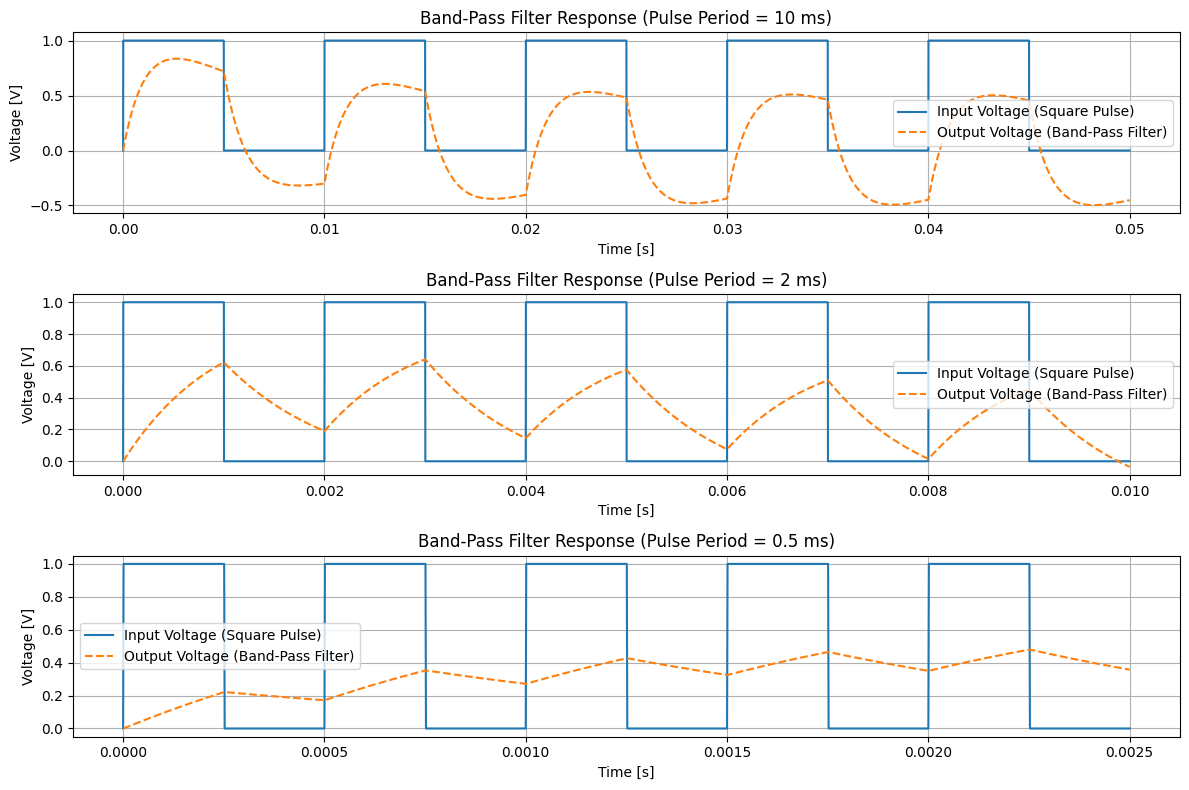

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
from PySpice.Probe.Plot import plot

# Function to simulate and return analysis for a given pulse frequency
def simulate_high_pass(pulse_period):
    circuit = Circuit(f'Band-Pass RLC Filter with Pulse Period = {pulse_period} s')
    circuit.PulseVoltageSource(1, 'input', circuit.gnd,
                               initial_value=0@u_V,
                               pulsed_value=1@u_V,
                               pulse_width=pulse_period / 2,
                               period=pulse_period)
    circuit.L(1, 'input', 'ic', 10@u_H)
    circuit.C(1, 'ic', 'output', 1@u_uF)
    circuit.R(1, 'output', circuit.gnd, 10@u_kOhm)
    simulator = circuit.simulator(temperature=25, nominal_temperature=25)
    analysis = simulator.transient(step_time=1@u_us, end_time=5 * pulse_period)
    return analysis

# Define pulse periods (frequencies: low, medium, high)
pulse_periods = [10@u_ms, 2@u_ms, 0.5@u_ms]

# Plot results
plt.figure(figsize=(12, 8))

for i, pulse_period in enumerate(pulse_periods, start=1):
    analysis = simulate_high_pass(pulse_period)
    plt.subplot(3, 1, i)
    plt.plot(analysis.time, analysis['input'], label='Input Voltage (Square Pulse)')
    plt.plot(analysis.time, analysis['output'], label='Output Voltage (Band-Pass Filter)', linestyle='dashed')
    plt.title(f'Band-Pass Filter Response (Pulse Period = {pulse_period})')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

## Conclusion

In this project, we delved into the foundational principles and practical applications of advanced electrical engineering concepts, including the Laplace Transform, complex frequency, Fourier Series, and Fourier Transform. These mathematical tools were thoroughly explored for their ability to analyze and interpret signals in both time and frequency domains, providing critical insights into the behavior of electrical circuits.

Furthermore, we examined the concepts of impedance and admittance in the S-domain, extending their utility to the analysis and design of circuits operating under dynamic conditions. The application of Mesh and Nodal Analysis in the S-domain demonstrated the powerful synergy between classical circuit theory and modern mathematical techniques. This approach not only simplifies the analysis of complex circuits but also offers a robust framework for addressing real-world engineering challenges.

The project concluded with an in-depth exploration of passive filter circuits, showcasing a variety of practical examples. These examples illustrated how the theoretical principles discussed earlier could be effectively applied to design filters that meet specific performance criteria. The passive filters demonstrated in this work highlighted their importance in signal processing, noise reduction, and frequency selection, further reinforcing the relevance of the presented concepts.

Through this comprehensive study, the project has established a solid foundation for understanding and applying advanced mathematical methods to electrical engineering problems. It emphasizes the interplay between theoretical frameworks and practical applications, underscoring the importance of these concepts in modern engineering design and analysis. This work aims to serve as a valuable resource for further studies and innovations in the field.



### Refrences

- **Hayt, W. H., Kemmerly, J. E., & Durbin, S. M.**
Engineering Circuit Analysis. 8th Edition. McGraw-Hill Education, 2012.
This book provides comprehensive coverage of circuit analysis techniques, including nodal and mesh analysis, Laplace transforms, and resonance in electrical circuits.
- **Electronic Tutorials - Online Resource**
Electronic Tutorials: Learn the Basics of Electronics Engineering.
Retrieved from https://www.electronics-tutorials.ws
This website offers tutorials on fundamental and advanced topics in electronics, covering circuit design, signal processing, and practical applications.